In [3]:
import os 
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import mean_absolute_percentage_error


In [4]:
data = pd.read_csv("TSF_HDFC.csv")
data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-01,624.500000,629.474976,613.825012,621.150024,605.373230,2780432.0
1,2016-08-02,623.500000,628.224976,620.200012,621.650024,605.860474,2664698.0
2,2016-08-03,620.549988,624.974976,615.500000,620.224976,604.471680,2366938.0
3,2016-08-04,623.299988,623.349976,616.799988,620.500000,604.739746,2331440.0
4,2016-08-05,623.700012,627.825012,620.875000,624.625000,608.760010,2892456.0
...,...,...,...,...,...,...,...
1229,2021-07-26,1430.000000,1444.000000,1428.099976,1434.550049,1434.550049,6583583.0
1230,2021-07-27,1436.099976,1449.900024,1436.099976,1439.750000,1439.750000,11200715.0
1231,2021-07-28,1435.050049,1438.699951,1404.000000,1417.300049,1417.300049,10335171.0
1232,2021-07-29,1428.250000,1429.949951,1413.300049,1418.250000,1418.250000,6851115.0


In [5]:
data = data[['Date', 'Open', 'Close', "High"]].dropna()
data.head()

,Date,Open,Close,High
0,2016-08-01,624.500000,621.150024,629.474976
1,2016-08-02,623.500000,621.650024,628.224976
2,2016-08-03,620.549988,620.224976,624.974976
3,2016-08-04,623.299988,620.500000,623.349976
4,2016-08-05,623.700012,624.625000,627.825012


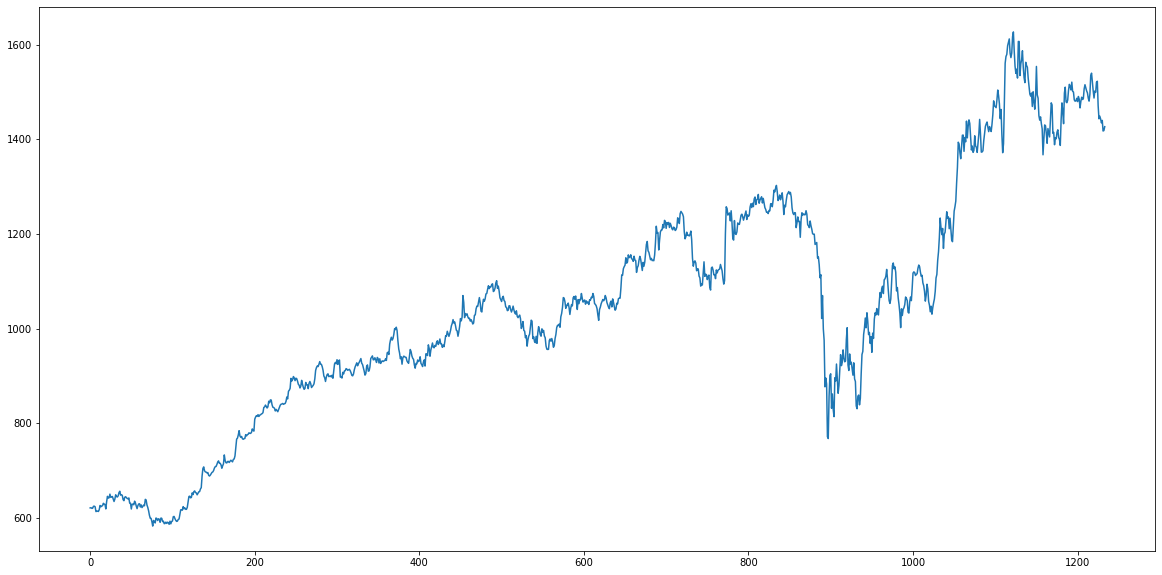

In [6]:
plt.figure(figsize = (20,10))
plt.plot(data["Close"])
plt.show()

In [7]:
data.describe()

,Open,Close,High
count,1232.000000,1232.000000,1232.000000
mean,1045.486059,1044.832832,1054.915015
std,250.629353,249.947815,253.134532
min,582.099976,582.750000,589.750000
25%,900.762497,900.006241,909.724991
50%,1041.512512,1041.662536,1052.200012
75%,1213.500000,1213.181274,1225.237488
max,1621.199951,1626.650024,1641.000000


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1232 entries, 0 to 1233
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1232 non-null   object 
 1   Open    1232 non-null   float64
 2   Close   1232 non-null   float64
 3   High    1232 non-null   float64
dtypes: float64(3), object(1)
memory usage: 48.1+ KB


In [9]:
data.tail(10)

,Date,Open,Close,High
1224,2021-07-16,1527.949951,1522.349976,1529.949951
1225,2021-07-19,1487.000000,1471.000000,1488.849976
1226,2021-07-20,1442.000000,1443.150024,1454.000000
1227,2021-07-22,1456.099976,1448.699951,1468.500000
1228,2021-07-23,1451.500000,1442.750000,1457.449951
1229,2021-07-26,1430.000000,1434.550049,1444.000000
1230,2021-07-27,1436.099976,1439.750000,1449.900024
1231,2021-07-28,1435.050049,1417.300049,1438.699951
1232,2021-07-29,1428.250000,1418.250000,1429.949951
1233,2021-07-30,1419.000000,1426.449951,1431.750000


In [10]:
# Train test split
test_start = 1050 

train = data.iloc[0:test_start]
test = data.iloc[test_start:]

y_hat = test.copy()
    

In [11]:
all_methods = list()
all_mape = list()

## Naive last 
### Just give the last value of the train data as prediction

In [12]:
train["Close"].iloc[-1]


1247.949951

In [13]:
y_hat["naive_last"] = train["Close"].iloc[-1]


In [14]:
y_hat

,Date,Open,Close,High,naive_last
1051,2020-11-04,1252.000000,1257.400024,1264.800049,1247.949951
1052,2020-11-05,1266.000000,1269.199951,1276.000000,1247.949951
1053,2020-11-06,1266.250000,1307.650024,1310.000000,1247.949951
1054,2020-11-09,1315.199951,1340.550049,1345.949951,1247.949951
1055,2020-11-10,1357.000000,1393.650024,1395.000000,1247.949951
...,...,...,...,...,...
1229,2021-07-26,1430.000000,1434.550049,1444.000000,1247.949951
1230,2021-07-27,1436.099976,1439.750000,1449.900024,1247.949951
1231,2021-07-28,1435.050049,1417.300049,1438.699951,1247.949951
1232,2021-07-29,1428.250000,1418.250000,1429.949951,1247.949951


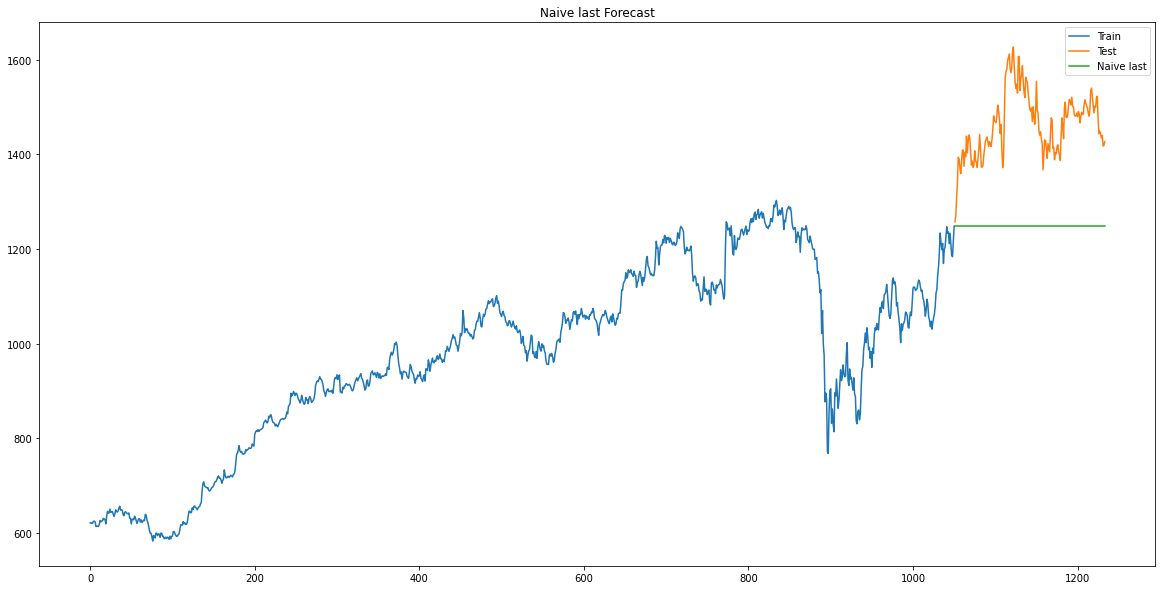

In [15]:
plt.figure(figsize = (20,10))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(y_hat.index, y_hat['naive_last'], label='Naive last')
plt.legend(loc = 'best')
plt.title("Naive last Forecast")
plt.show()

In [16]:
rmse = sqrt(mean_squared_error(test["Close"], y_hat["naive_last"]))
print("Naive last forecast rmse:", rmse)


Naive last forecast rmse: 226.37193617286536


In [17]:
mape = mean_absolute_percentage_error(test["Close"], y_hat["naive_last"])
print("Naive last forecast mape:", mape)

all_methods.append("Naive last")
all_mape.append(mape)


Naive last forecast mape: 0.1458348490035773


## Naive average
### Give prediction as average of the train data 

In [18]:
y_hat["naive_avg"] = train["Close"].mean()


In [19]:
y_hat

,Date,Open,Close,High,naive_last,naive_avg
1051,2020-11-04,1252.000000,1257.400024,1264.800049,1247.949951,972.158666
1052,2020-11-05,1266.000000,1269.199951,1276.000000,1247.949951,972.158666
1053,2020-11-06,1266.250000,1307.650024,1310.000000,1247.949951,972.158666
1054,2020-11-09,1315.199951,1340.550049,1345.949951,1247.949951,972.158666
1055,2020-11-10,1357.000000,1393.650024,1395.000000,1247.949951,972.158666
...,...,...,...,...,...,...
1229,2021-07-26,1430.000000,1434.550049,1444.000000,1247.949951,972.158666
1230,2021-07-27,1436.099976,1439.750000,1449.900024,1247.949951,972.158666
1231,2021-07-28,1435.050049,1417.300049,1438.699951,1247.949951,972.158666
1232,2021-07-29,1428.250000,1418.250000,1429.949951,1247.949951,972.158666


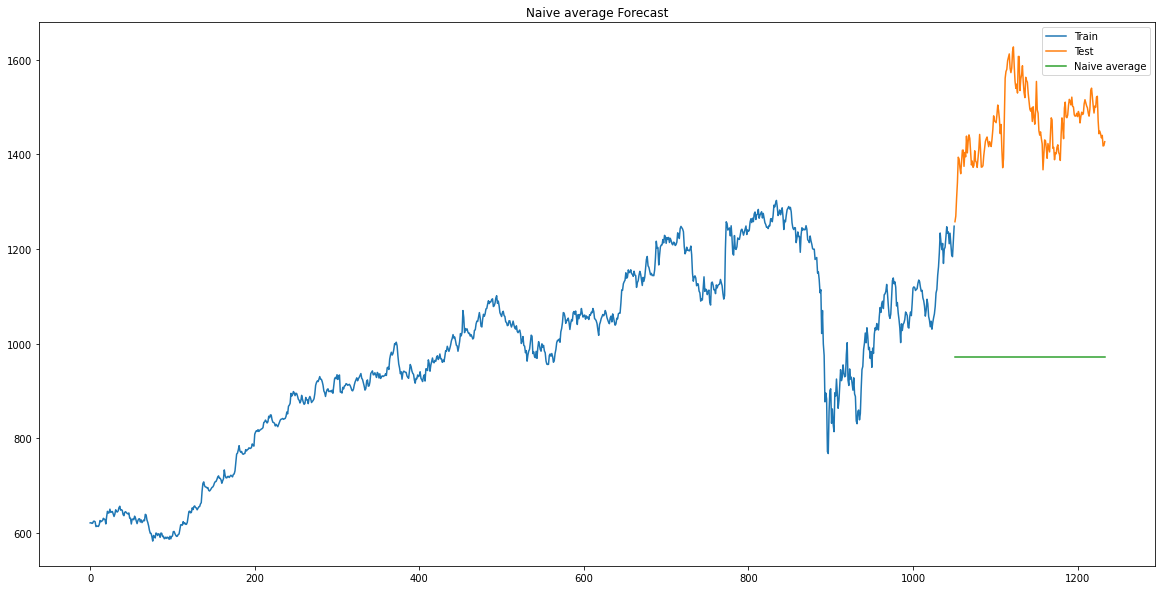

In [20]:
plt.figure(figsize = (20,10))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(y_hat.index, y_hat['naive_avg'], label='Naive average')
plt.legend(loc = 'best')
plt.title("Naive average Forecast")
plt.show()

In [21]:
rmse = sqrt(mean_squared_error(test["Close"], y_hat["naive_avg"]))
print("Naive average forecast rmse:", rmse)


Naive average forecast rmse: 496.521372519729


In [22]:
mape = mean_absolute_percentage_error(test["Close"], y_hat["naive_avg"])
print("Naive average forecast mape:", mape)

all_methods.append("Naive average")
all_mape.append(mape)



Naive average forecast mape: 0.3346014770959094


## Simple Moving average

### Simple moving average is mainly used to remove random variations and noise from the data. Since observations closer in time are likely to have similar values, these averages are calculted over a sequential set of points in a window length. 

In [23]:
window = 10
data["SMA"] = data["Close"].rolling(window).mean()

In [24]:
data

,Date,Open,Close,High,SMA
0,2016-08-01,624.500000,621.150024,629.474976,NaN
1,2016-08-02,623.500000,621.650024,628.224976,NaN
2,2016-08-03,620.549988,620.224976,624.974976,NaN
3,2016-08-04,623.299988,620.500000,623.349976,NaN
4,2016-08-05,623.700012,624.625000,627.825012,NaN
...,...,...,...,...,...
1229,2021-07-26,1430.000000,1434.550049,1444.000000,1477.119995
1230,2021-07-27,1436.099976,1439.750000,1449.900024,1472.394995
1231,2021-07-28,1435.050049,1417.300049,1438.699951,1463.940002
1232,2021-07-29,1428.250000,1418.250000,1429.949951,1455.850000


In [25]:
y_hat["SMA"] = data["SMA"][test_start:]
data.drop("SMA", axis=1)
y_hat

,Date,Open,Close,High,naive_last,naive_avg,SMA
1051,2020-11-04,1252.000000,1257.400024,1264.800049,1247.949951,972.158666,1221.405005
1052,2020-11-05,1266.000000,1269.199951,1276.000000,1247.949951,972.158666,1224.994995
1053,2020-11-06,1266.250000,1307.650024,1310.000000,1247.949951,972.158666,1232.179993
1054,2020-11-09,1315.199951,1340.550049,1345.949951,1247.949951,972.158666,1245.144995
1055,2020-11-10,1357.000000,1393.650024,1395.000000,1247.949951,972.158666,1261.200000
...,...,...,...,...,...,...,...
1229,2021-07-26,1430.000000,1434.550049,1444.000000,1247.949951,972.158666,1477.119995
1230,2021-07-27,1436.099976,1439.750000,1449.900024,1247.949951,972.158666,1472.394995
1231,2021-07-28,1435.050049,1417.300049,1438.699951,1247.949951,972.158666,1463.940002
1232,2021-07-29,1428.250000,1418.250000,1429.949951,1247.949951,972.158666,1455.850000


<AxesSubplot:>

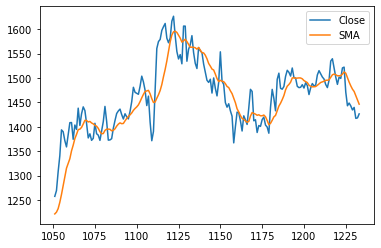

In [26]:
# compare original and sma curve
y_hat.plot.line(y = ['Close','SMA'])



In [27]:
# evaluate for test data 
rmse = sqrt(mean_squared_error(y_hat["Close"], y_hat["SMA"]))
print("SMA rmse:", rmse)


mape = mean_absolute_percentage_error(y_hat["Close"], y_hat["SMA"])
print("SMA mape:", mape)

all_methods.append("SMA")
all_mape.append(mape)


SMA rmse: 38.87050897751625
SMA mape: 0.020124663255751532


## Simple exponential smoothing

### Single Exponential Smoothing, SES for short, also called Simple Exponential Smoothing, is a time series forecasting method for univariate data without a trend or seasonality. It requires a single parameter, called alpha also called the smoothing factor or smoothing coefficient. Large values mean that the model pays attention mainly to the most recent past observations, whereas smaller values mean more of the history is taken into account when making a prediction.

In [28]:
from statsmodels.tsa.api import SimpleExpSmoothing

# fit  SES model without specifying smooth parameter, so library does it for us
fit_y = SimpleExpSmoothing(np.asarray(train['Close'])).fit(optimized=True)

c:\users\satish\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


In [29]:
print("Optimal alpha chosen:", fit_y.model.params['smoothing_level'])

Optimal alpha chosen: 0.9999999850988384


In [30]:
# fit SES model with explicitly supplied smooth parameter

fit_y_own = SimpleExpSmoothing(np.asarray(train['Close'])).fit(smoothing_level = 0.6, optimized = False)

In [31]:
rmse_train_opti = sqrt(mean_squared_error(train['Close'], fit_y.fittedvalues))
print("SES optimal train rmse: ", rmse_train_opti)

SES optimal train rmse:  15.056029723219918


In [32]:
rmse_train = sqrt(mean_squared_error(train['Close'], fit_y_own.fittedvalues))
print("SES manual train rmse: ", rmse_train)

SES manual train rmse:  16.43960952050187


In [33]:
# forecast using both models
y_hat["SES_opti_fcast"] = fit_y.forecast(len(y_hat))
y_hat["SES_manu_fcast"] = fit_y_own.forecast(len(y_hat))


In [34]:
mape = mean_absolute_percentage_error(test["Close"], y_hat["SES_opti_fcast"])
print("SES optimal mape:", mape)

all_methods.append("SES")
all_mape.append(mape)


SES optimal mape: 0.14583484933708965


In [35]:
mape = mean_absolute_percentage_error(test["Close"], y_hat["SES_manu_fcast"])
print("SES manual mape:", mape)


SES manual mape: 0.15757733044776912


SES optimal seems better than manual

In [36]:
len(y_hat)

182

In [37]:
y_hat

,Date,Open,Close,High,naive_last,naive_avg,SMA,SES_opti_fcast,SES_manu_fcast
1051,2020-11-04,1252.000000,1257.400024,1264.800049,1247.949951,972.158666,1221.405005,1247.949951,1230.793984
1052,2020-11-05,1266.000000,1269.199951,1276.000000,1247.949951,972.158666,1224.994995,1247.949951,1230.793984
1053,2020-11-06,1266.250000,1307.650024,1310.000000,1247.949951,972.158666,1232.179993,1247.949951,1230.793984
1054,2020-11-09,1315.199951,1340.550049,1345.949951,1247.949951,972.158666,1245.144995,1247.949951,1230.793984
1055,2020-11-10,1357.000000,1393.650024,1395.000000,1247.949951,972.158666,1261.200000,1247.949951,1230.793984
...,...,...,...,...,...,...,...,...,...
1229,2021-07-26,1430.000000,1434.550049,1444.000000,1247.949951,972.158666,1477.119995,1247.949951,1230.793984
1230,2021-07-27,1436.099976,1439.750000,1449.900024,1247.949951,972.158666,1472.394995,1247.949951,1230.793984
1231,2021-07-28,1435.050049,1417.300049,1438.699951,1247.949951,972.158666,1463.940002,1247.949951,1230.793984
1232,2021-07-29,1428.250000,1418.250000,1429.949951,1247.949951,972.158666,1455.850000,1247.949951,1230.793984


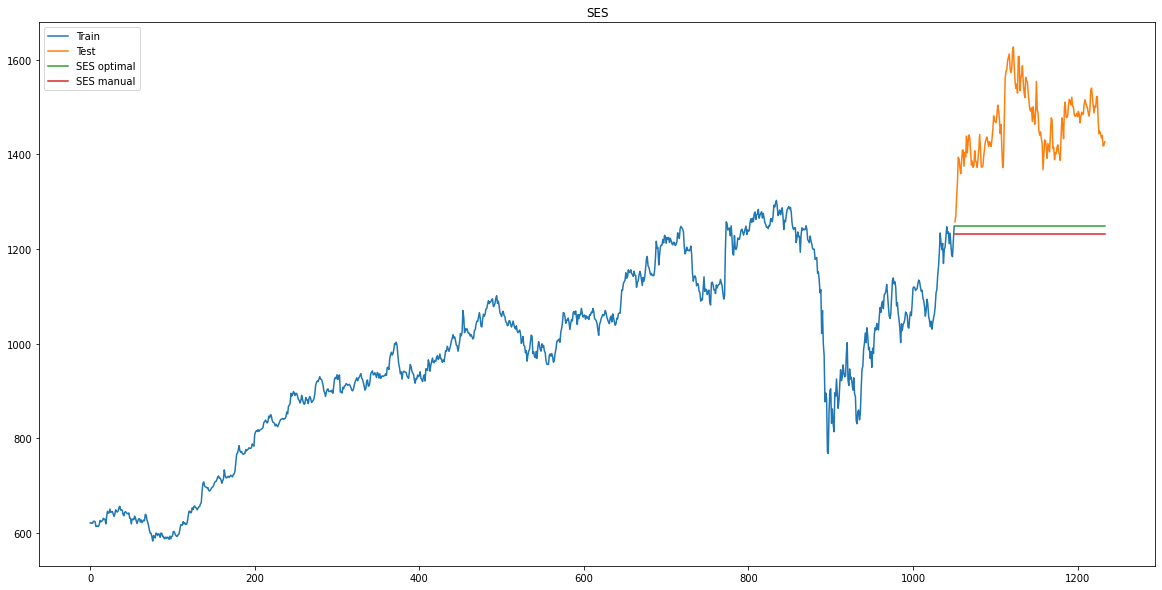

In [38]:
plt.figure(figsize = (20,10))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(y_hat.index, y_hat['SES_opti_fcast'], label='SES optimal')
plt.plot(y_hat.index, y_hat['SES_manu_fcast'], label='SES manual')

plt.legend(loc = 'best')
plt.title("SES")
plt.show()

## Double exponential smoothing

### Double Exponential Smoothing is an extension to Exponential Smoothing that explicitly adds support for trends but not seasonality time series. In addition to the alpha parameter for controlling smoothing factor for the level, an additional smoothing factor is added to control the decay of the influence of the change in trend called beta.

In [39]:
from statsmodels.tsa.api import Holt

fit = Holt(np.asanyarray(train['Close']), damped_trend = True).fit(smoothing_level = 0.5, smoothing_slope = 0.9, 
                                                                   damping_slope = 0.9, optimized = False)
y_hat['DES_manual'] = fit.forecast(len(test))
y_hat

c:\users\satish\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
<ipython-input-39-0fc7ce2e338a>:3: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  fit = Holt(np.asanyarray(train['Close']), damped_trend = True).fit(smoothing_level = 0.5, smoothing_slope = 0.9,
c:\users\satish\appdata\local\programs\python\python39\lib\site-packages\pandas\util\_decorators.py:199: FutureWarning: the 'damping_slope'' keyword is deprecated, use 'damping_trend' instead
  return func(*args, **kwargs)


,Date,Open,Close,High,naive_last,naive_avg,SMA,SES_opti_fcast,SES_manu_fcast,DES_manual
1051,2020-11-04,1252.000000,1257.400024,1264.800049,1247.949951,972.158666,1221.405005,1247.949951,1230.793984,1249.626430
1052,2020-11-05,1266.000000,1269.199951,1276.000000,1247.949951,972.158666,1224.994995,1247.949951,1230.793984,1272.945878
1053,2020-11-06,1266.250000,1307.650024,1310.000000,1247.949951,972.158666,1232.179993,1247.949951,1230.793984,1293.933382
1054,2020-11-09,1315.199951,1340.550049,1345.949951,1247.949951,972.158666,1245.144995,1247.949951,1230.793984,1312.822136
1055,2020-11-10,1357.000000,1393.650024,1395.000000,1247.949951,972.158666,1261.200000,1247.949951,1230.793984,1329.822014
...,...,...,...,...,...,...,...,...,...,...
1229,2021-07-26,1430.000000,1434.550049,1444.000000,1247.949951,972.158666,1477.119995,1247.949951,1230.793984,1482.820914
1230,2021-07-27,1436.099976,1439.750000,1449.900024,1247.949951,972.158666,1472.394995,1247.949951,1230.793984,1482.820914
1231,2021-07-28,1435.050049,1417.300049,1438.699951,1247.949951,972.158666,1463.940002,1247.949951,1230.793984,1482.820914
1232,2021-07-29,1428.250000,1418.250000,1429.949951,1247.949951,972.158666,1455.850000,1247.949951,1230.793984,1482.820915


In [40]:
rmse = sqrt(mean_squared_error(test["Close"], y_hat["DES_manual"]))
print("DES_manual rmse:", rmse)


mape = mean_absolute_percentage_error(test["Close"], y_hat["DES_manual"])
print("DES_manual mape:", mape)

all_methods.append("DES")
all_mape.append(mape)


DES_manual rmse: 57.45175191666693
DES_manual mape: 0.03118727536224154


In [41]:
from statsmodels.tsa.api import Holt

fit = Holt(np.asanyarray(train['Close']), damped_trend = True).fit( optimized = True)
y_hat['DES_optimal'] = fit.forecast(len(test))
y_hat

c:\users\satish\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,Date,Open,Close,High,naive_last,naive_avg,SMA,SES_opti_fcast,SES_manu_fcast,DES_manual,DES_optimal
1051,2020-11-04,1252.000000,1257.400024,1264.800049,1247.949951,972.158666,1221.405005,1247.949951,1230.793984,1249.626430,1247.806140
1052,2020-11-05,1266.000000,1269.199951,1276.000000,1247.949951,972.158666,1224.994995,1247.949951,1230.793984,1272.945878,1247.824956
1053,2020-11-06,1266.250000,1307.650024,1310.000000,1247.949951,972.158666,1232.179993,1247.949951,1230.793984,1293.933382,1247.843584
1054,2020-11-09,1315.199951,1340.550049,1345.949951,1247.949951,972.158666,1245.144995,1247.949951,1230.793984,1312.822136,1247.862027
1055,2020-11-10,1357.000000,1393.650024,1395.000000,1247.949951,972.158666,1261.200000,1247.949951,1230.793984,1329.822014,1247.880287
...,...,...,...,...,...,...,...,...,...,...,...
1229,2021-07-26,1430.000000,1434.550049,1444.000000,1247.949951,972.158666,1477.119995,1247.949951,1230.793984,1482.820914,1249.374468
1230,2021-07-27,1436.099976,1439.750000,1449.900024,1247.949951,972.158666,1472.394995,1247.949951,1230.793984,1482.820914,1249.377670
1231,2021-07-28,1435.050049,1417.300049,1438.699951,1247.949951,972.158666,1463.940002,1247.949951,1230.793984,1482.820914,1249.380839
1232,2021-07-29,1428.250000,1418.250000,1429.949951,1247.949951,972.158666,1455.850000,1247.949951,1230.793984,1482.820915,1249.383978


In [42]:
rmse = sqrt(mean_squared_error(test["Close"], y_hat["DES_optimal"]))
print("DES_optimal rmse:", rmse)


mape = mean_absolute_percentage_error(test["Close"], y_hat["DES_optimal"])
print("DES_optimal mape:", mape)


DES_optimal rmse: 225.48191282449764
DES_optimal mape: 0.14524456897751406


In [43]:
fit.model.params

{'smoothing_level': 0.9950424447094968,
 'smoothing_trend': 0.00012798387507077,
 'smoothing_seasonal': nan,
 'damping_trend': 0.9900441046508331,
 'initial_level': 621.1400630625001,
 'initial_trend': 1.0377148437500001,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

DES manual seems better than optimal

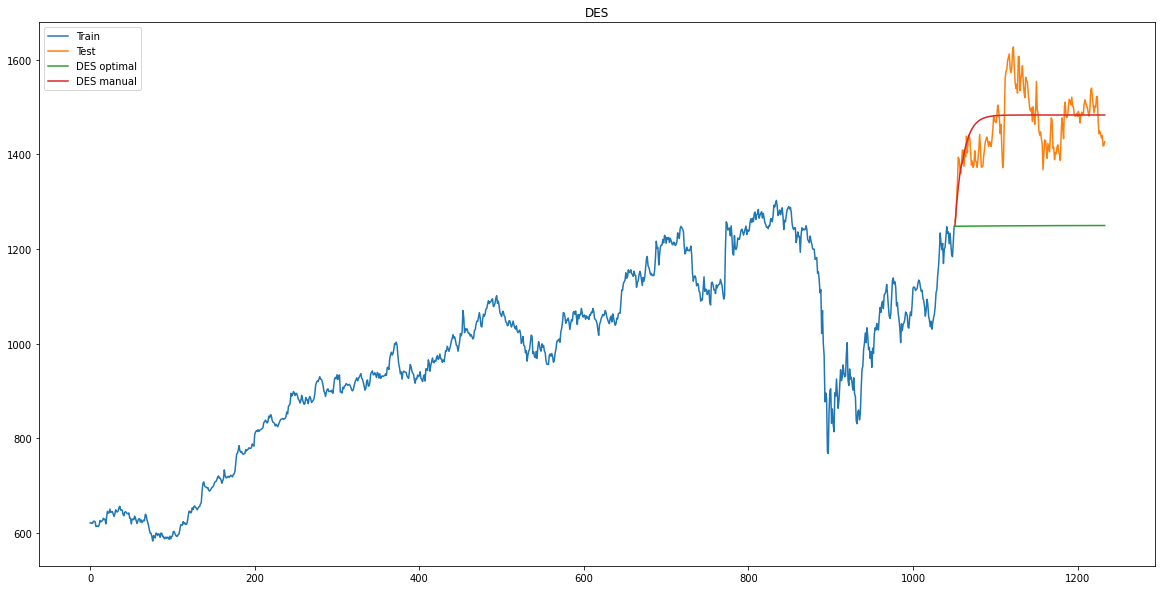

In [44]:
plt.figure(figsize = (20,10))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(y_hat.index, y_hat['DES_optimal'], label='DES optimal')
plt.plot(y_hat.index, y_hat['DES_manual'], label='DES manual')

plt.legend(loc = 'best')
plt.title("DES")
plt.show()

## Triple exponential smoothing

### TES when there is seasonality in dataset aprt from level and trend. Datasets which show a similar set of pattern after fixed intervals of a time period have seasonality. 


In [45]:
#Hyperparameters:

# Alpha: Smoothing factor for the level.
# Beta: Smoothing factor for the trend.
# Gamma: Smoothing factor for the seasonality.
# Trend Type: Additive or multiplicative.
# Dampen Type: Additive or multiplicative.
# Phi: Damping coefficient.
# Seasonality Type: Additive or multiplicative.
# Period: Time steps in seasonal period.

In [46]:
# Using Holts winter method in ExponentialSmoothing library
from statsmodels.tsa.holtwinters import ExponentialSmoothing

model1 = ExponentialSmoothing(np.asarray(train['Close']), seasonal_periods = 20, trend = 'add', seasonal = 'mul')
model2 = ExponentialSmoothing(np.asarray(train['Close']), seasonal_periods = 20, trend = 'add', seasonal = 'add')

fit1 = model1.fit(optimized = True)
fit2 = model2.fit(optimized = True)

y_hat['TES_add_mul'] = fit1.forecast(len(test))
y_hat['TES_add_add'] = fit2.forecast(len(test))

y_hat


c:\users\satish\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


,Date,Open,Close,High,naive_last,naive_avg,SMA,SES_opti_fcast,SES_manu_fcast,DES_manual,DES_optimal,TES_add_mul,TES_add_add
1051,2020-11-04,1252.000000,1257.400024,1264.800049,1247.949951,972.158666,1221.405005,1247.949951,1230.793984,1249.626430,1247.806140,1246.614087,1246.064147
1052,2020-11-05,1266.000000,1269.199951,1276.000000,1247.949951,972.158666,1224.994995,1247.949951,1230.793984,1272.945878,1247.824956,1244.426545,1244.595078
1053,2020-11-06,1266.250000,1307.650024,1310.000000,1247.949951,972.158666,1232.179993,1247.949951,1230.793984,1293.933382,1247.843584,1247.597648,1247.952592
1054,2020-11-09,1315.199951,1340.550049,1345.949951,1247.949951,972.158666,1245.144995,1247.949951,1230.793984,1312.822136,1247.862027,1250.374864,1250.432301
1055,2020-11-10,1357.000000,1393.650024,1395.000000,1247.949951,972.158666,1261.200000,1247.949951,1230.793984,1329.822014,1247.880287,1250.674532,1250.813243
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2021-07-26,1430.000000,1434.550049,1444.000000,1247.949951,972.158666,1477.119995,1247.949951,1230.793984,1482.820914,1249.374468,1374.455254,1353.433876
1230,2021-07-27,1436.099976,1439.750000,1449.900024,1247.949951,972.158666,1472.394995,1247.949951,1230.793984,1482.820914,1249.377670,1368.639046,1349.679149
1231,2021-07-28,1435.050049,1417.300049,1438.699951,1247.949951,972.158666,1463.940002,1247.949951,1230.793984,1482.820914,1249.380839,1374.716020,1353.583879
1232,2021-07-29,1428.250000,1418.250000,1429.949951,1247.949951,972.158666,1455.850000,1247.949951,1230.793984,1482.820915,1249.383978,1374.379501,1352.850071


In [47]:
print(fit1.model.params)
print(fit2.model.params)


{'smoothing_level': 0.959650719669162, 'smoothing_trend': 0.00010020288819523302, 'smoothing_seasonal': 0.04034121170517017, 'damping_trend': nan, 'initial_level': 969.352395414106, 'initial_trend': 1.113645053882475, 'initial_seasons': array([0.64711624, 0.64948859, 0.6488832 , 0.64905968, 0.65009884,
       0.64998443, 0.65019296, 0.6502367 , 0.65056379, 0.65172078,
       0.64893813, 0.64853981, 0.65094555, 0.65164746, 0.65102164,
       0.64940618, 0.65088339, 0.65240772, 0.6524052 , 0.6492849 ]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}
{'smoothing_level': 0.9605716294711707, 'smoothing_trend': 0.00265257810677, 'smoothing_seasonal': 0.02994686622983786, 'damping_trend': nan, 'initial_level': 969.2906611996326, 'initial_trend': 0.5868363901817408, 'initial_seasons': array([-347.07323997, -345.98083825, -348.47863293, -349.48629937,
       -348.670655  , -349.76354498, -348.55836503, -350.04117193,
       -349.30056992, -348.09051247, -350.74980567, -350.32548441,


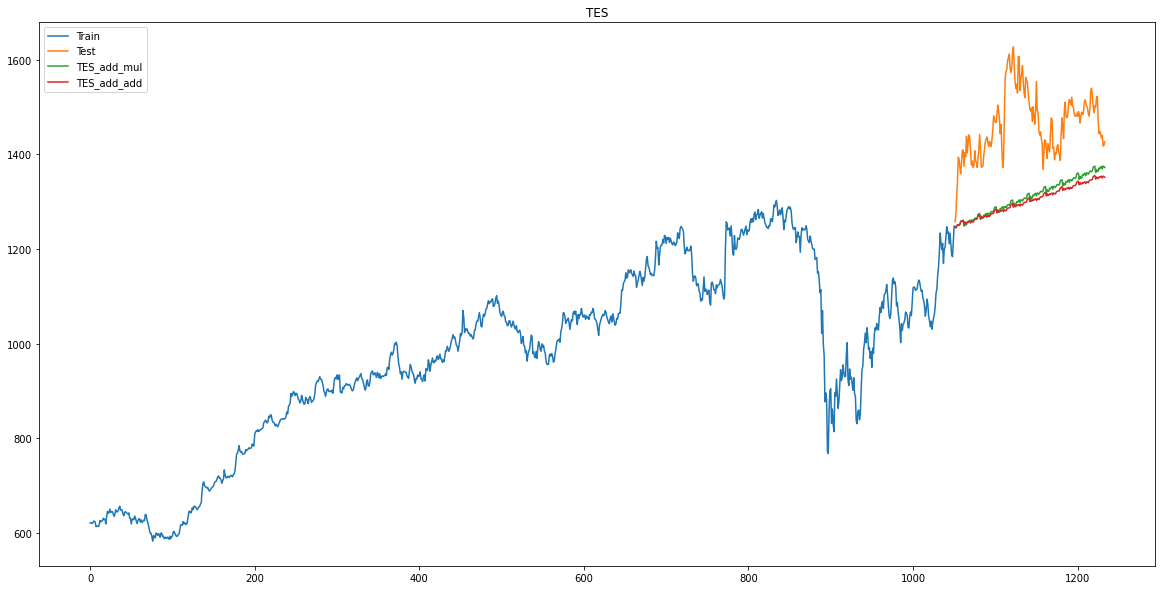

In [48]:
plt.figure(figsize = (20,10))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(y_hat.index, y_hat['TES_add_mul'], label='TES_add_mul')
plt.plot(y_hat.index, y_hat['TES_add_add'], label='TES_add_add')

plt.legend(loc = 'best')
plt.title("TES")
plt.show()

In [49]:
rmse = sqrt(mean_squared_error(test["Close"], y_hat["TES_add_mul"]))
print("TES add_mul rmse:", rmse)


mape = mean_absolute_percentage_error(test["Close"], y_hat["TES_add_mul"])
print("TES add_mul mape:", mape)

rmse = sqrt(mean_squared_error(test["Close"], y_hat["TES_add_add"]))
print("TES add_add rmse:", rmse)


mape = mean_absolute_percentage_error(test["Close"], y_hat["TES_add_add"])
print("TES add_add mape:", mape)

all_methods.append("TES")
all_mape.append(mape)



TES add_mul rmse: 166.31222228676432
TES add_mul mape: 0.1030874266211166
TES add_add rmse: 174.23201557955673
TES add_add mape: 0.10921489713994488


TES additive-additive seems better than additive-multiplicative

<ipython-input-50-bc5c7e4a636a>:2: FutureWarning: the 'freq'' keyword is deprecated, use 'period' instead
  sm.tsa.seasonal_decompose(train["Close"], model = 'add', freq = 20 ).plot()


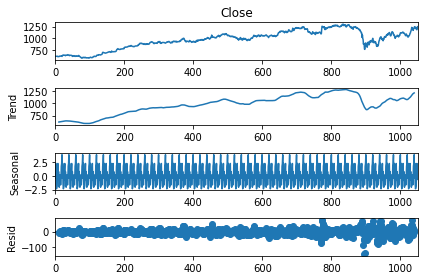

In [50]:
import statsmodels.api as sm
sm.tsa.seasonal_decompose(train["Close"], model = 'add', freq = 20 ).plot()
plt.show()


## ACF , PACF

### Autocorrelation is a calculation of the correlation of the time series observations with values of the same series, but at previous times. The time steps at those previous times are referred to as lags.

### A partial autocorrelation is a summary of the relationship between an observation in a time series with observations at prior time steps with the relationships of intervening observations removed and the indirect correlations are removed.

In [51]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [52]:
# unbiased - bool
# If True, then denominators for autocovariance are n-k, otherwise n
acf(train["Close"], unbiased = False, nlags = 10)

# here we get ouput of acf for lag = i where i is the index in the array. Thus for lag = 2, acf = -0.641, matches with excel

<ipython-input-52-be39f6cfc285>:3: FutureWarning: the 'unbiased'' keyword is deprecated, use 'adjusted' instead
  acf(train["Close"], unbiased = False, nlags = 10)
c:\users\satish\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


array([1.        , 0.99432732, 0.98879895, 0.98369374, 0.97859955,
       0.97321419, 0.96723305, 0.96213255, 0.95640303, 0.95045274,
       0.94465766])

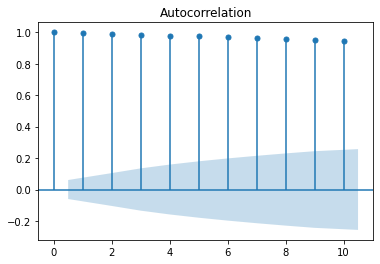

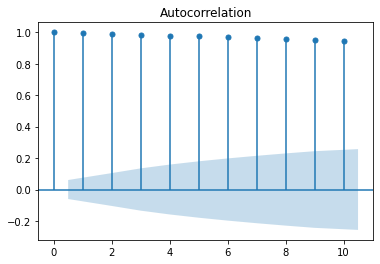

In [53]:
plot_acf(train["Close"], lags = 10)

We can see all the lags are significant

In [54]:
pacf(train["Close"], method = "ols", nlags = 10)
# here we get ouput of pacf for lag = i where i is the index in the array. 

array([ 1.        ,  0.99629767, -0.01521597,  0.03454163,  0.00505299,
       -0.02640994, -0.06979298,  0.1211937 , -0.06896478, -0.03022872,
        0.04361903])

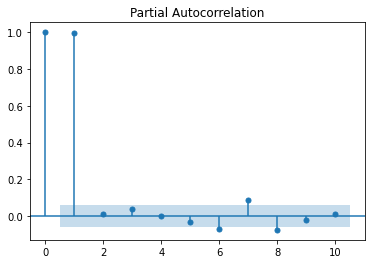

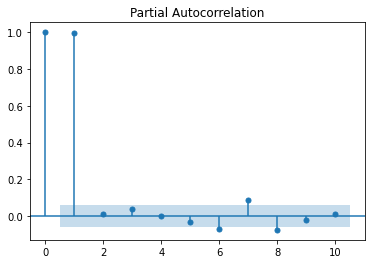

In [55]:
plot_pacf(train["Close"], lags = 10)

For ACF all lags are significant, so not clear. For PACF We can see all lags till lag 1 are significant, then shuts down.

## ADF test for stationarity

In [56]:
from statsmodels.tsa.stattools import adfuller


In [57]:
test_result = adfuller(train['Close'])

In [58]:
#Ho: It is non-stationary
#H1: It is stationary
test_result

(-1.6028800802631662,
 0.48214655808527696,
 7,
 1042,
 {'1%': -3.43664125006105,
  '5%': -2.864317735333004,
  '10%': -2.5682489786730818},
 8491.079689106715)

In [59]:
def adfuller_test(series):
    result = adfuller(series)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("Weak evidence against null hypothesis, indicating it is non-stationary ")

adfuller_test(train['Close'])

ADF Test Statistic : -1.6028800802631662
p-value : 0.48214655808527696
#Lags Used : 7
Number of Observations : 1042
Weak evidence against null hypothesis, indicating it is non-stationary 


Try taking log of price

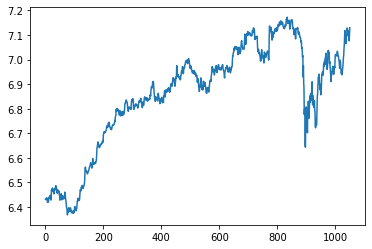

In [60]:
log_price = np.log(train["Close"])
plt.plot(log_price)

In [61]:
adfuller_test(log_price)

ADF Test Statistic : -1.725614877119332
p-value : 0.41796557948878554
#Lags Used : 11
Number of Observations : 1038
Weak evidence against null hypothesis, indicating it is non-stationary 


In [62]:
# try auto arima
from pmdarima import auto_arima

model = auto_arima(train["Close"], trace = "True")

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=4.95 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=8669.592, Time=0.05 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=8671.392, Time=0.28 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=8671.377, Time=0.33 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=8669.244, Time=0.03 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=8668.950, Time=1.14 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=8674.045, Time=1.08 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.79 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=8672.121, Time=0.53 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=8672.060, Time=0.36 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=8668.550, Time=0.37 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=8670.981, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=8670.999, Time=0.06 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=8673.764, Time=0.38 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=8

Try differencing the data

In [162]:
train['Price First Difference'] = train['Close'] - train['Close'].shift(1)
train['Price Second Difference'] = train['Close'] - train['Close'].shift(2)

train.head()

,Date,Open,Close,High,Close First Difference,Open First Difference,High First Difference,Price First Difference,Price Second Difference
0,2016-08-01,624.500000,621.150024,629.474976,NaN,NaN,NaN,NaN,NaN
1,2016-08-02,623.500000,621.650024,628.224976,0.500000,-1.000000,-1.250000,0.500000,NaN
2,2016-08-03,620.549988,620.224976,624.974976,-1.425048,-2.950012,-3.250000,-1.425048,-0.925048
3,2016-08-04,623.299988,620.500000,623.349976,0.275024,2.750000,-1.625000,0.275024,-1.150024
4,2016-08-05,623.700012,624.625000,627.825012,4.125000,0.400024,4.475036,4.125000,4.400024


In [163]:
adfuller_test(train["Price First Difference"].dropna())
#adfuller_test(data["Price Second Difference"].dropna)

ADF Test Statistic : -11.936807313732704
p-value : 4.641837556618038e-22
#Lags Used : 6
Number of Observations : 1042
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


<AxesSubplot:>

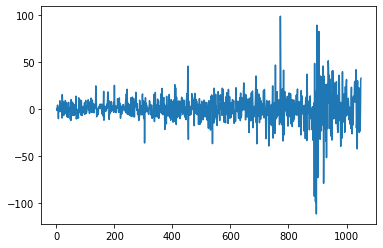

In [164]:
train["Price First Difference"].plot()

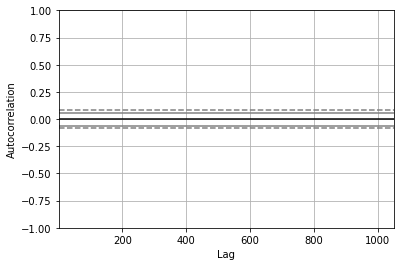

In [165]:
# Autocorrelation plot
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(train['Price First Difference'])
plt.show()

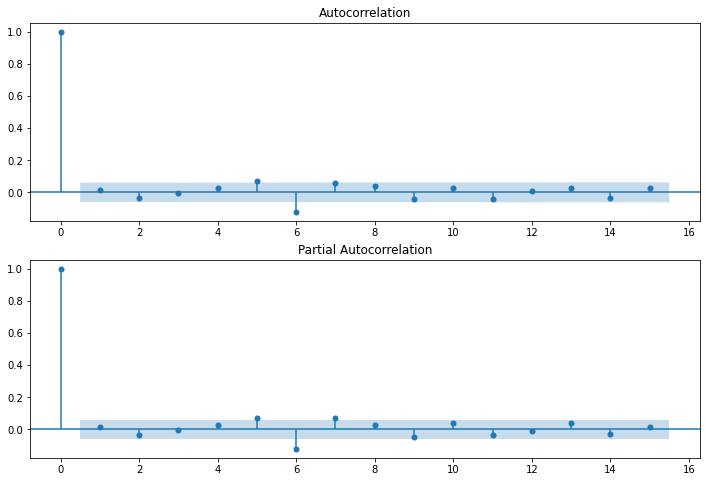

In [166]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
import statsmodels.api as sm

fig = plt.figure(figsize=(12,8))
ax1 = fig.add_subplot(211)

fig = sm.graphics.tsa.plot_acf(train['Price First Difference'].dropna(), lags=15,ax=ax1)
ax2 = fig.add_subplot(212)

fig = sm.graphics.tsa.plot_pacf(train['Price First Difference'].dropna(), lags=15,ax=ax2)

### From this we can observe that acf shuts down after lag 0 (q) and pacf only after lag 0 (p), hence these can be potential parameters for arima. So it's not clear from the graph.

## Auto arima

In [64]:
from pmdarima import auto_arima

# Fit auto_arima function 
stepwise_fit = auto_arima(train['Close'], start_p = 1, start_q = 1,
                          max_p = 3, max_q = 3, m = 20,
                          start_P = 0, seasonal = True,
                          d = 1, D = 1, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True) 

Performing stepwise search to minimize aic
 ARIMA(1,1,1)(0,1,1)[20]             : AIC=inf, Time=11.57 sec
 ARIMA(0,1,0)(0,1,0)[20]             : AIC=9205.032, Time=0.17 sec
 ARIMA(1,1,0)(1,1,0)[20]             : AIC=8908.043, Time=2.01 sec
 ARIMA(0,1,1)(0,1,1)[20]             : AIC=inf, Time=7.33 sec
 ARIMA(1,1,0)(0,1,0)[20]             : AIC=9206.923, Time=0.32 sec
 ARIMA(1,1,0)(2,1,0)[20]             : AIC=8829.835, Time=5.96 sec
 ARIMA(1,1,0)(2,1,1)[20]             : AIC=inf, Time=31.65 sec
 ARIMA(1,1,0)(1,1,1)[20]             : AIC=inf, Time=8.95 sec
 ARIMA(0,1,0)(2,1,0)[20]             : AIC=8827.897, Time=6.17 sec
 ARIMA(0,1,0)(1,1,0)[20]             : AIC=8906.321, Time=3.00 sec
 ARIMA(0,1,0)(2,1,1)[20]             : AIC=inf, Time=37.29 sec
 ARIMA(0,1,0)(1,1,1)[20]             : AIC=inf, Time=14.03 sec
 ARIMA(0,1,1)(2,1,0)[20]             : AIC=8829.829, Time=7.38 sec
 ARIMA(1,1,1)(2,1,0)[20]             : AIC=inf, Time=27.32 sec
 ARIMA(0,1,0)(2,1,0)[20] intercept   : AIC=8829.8

In [65]:
stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1050
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 20)   Log Likelihood               -4410.948
Date:                            Wed, 11 Aug 2021   AIC                           8827.897
Time:                                    22:25:33   BIC                           8842.706
Sample:                                         0   HQIC                          8833.518
                                           - 1050                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L20      -0.6528      0.021    -31.520      0.000      -0.693      -0.612
ar.S.L40      -0.2786      0.018    -15.162      0.000      -0.315      -0.243
sigma2       306.8490      6.386     48.048      0.000     294.332     319.366
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              2428.62
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):              12.27   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
y_hat["auto_arima"] = stepwise_fit.predict(n_periods = len(test["Close"]))
y_hat

# This is same as doing SARIMAX with (0,1,0)(2,1,0)[20]

,Date,Open,Close,High,naive_last,naive_avg,SMA,SES_opti_fcast,SES_manu_fcast,DES_manual,DES_optimal,TES_add_mul,TES_add_add,auto_arima
1051,2020-11-04,1252.000000,1257.400024,1264.800049,1247.949951,972.158666,1221.405005,1247.949951,1230.793984,1249.626430,1247.806140,1246.614087,1246.064147,1259.438017
1052,2020-11-05,1266.000000,1269.199951,1276.000000,1247.949951,972.158666,1224.994995,1247.949951,1230.793984,1272.945878,1247.824956,1244.426545,1244.595078,1262.905903
1053,2020-11-06,1266.250000,1307.650024,1310.000000,1247.949951,972.158666,1232.179993,1247.949951,1230.793984,1293.933382,1247.843584,1247.597648,1247.952592,1273.878424
1054,2020-11-09,1315.199951,1340.550049,1345.949951,1247.949951,972.158666,1245.144995,1247.949951,1230.793984,1312.822136,1247.862027,1250.374864,1250.432301,1255.663214
1055,2020-11-10,1357.000000,1393.650024,1395.000000,1247.949951,972.158666,1261.200000,1247.949951,1230.793984,1329.822014,1247.880287,1250.674532,1250.813243,1242.165343
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2021-07-26,1430.000000,1434.550049,1444.000000,1247.949951,972.158666,1477.119995,1247.949951,1230.793984,1482.820914,1249.374468,1374.455254,1353.433876,1860.153224
1230,2021-07-27,1436.099976,1439.750000,1449.900024,1247.949951,972.158666,1472.394995,1247.949951,1230.793984,1482.820914,1249.377670,1368.639046,1349.679149,1877.392731
1231,2021-07-28,1435.050049,1417.300049,1438.699951,1247.949951,972.158666,1463.940002,1247.949951,1230.793984,1482.820914,1249.380839,1374.716020,1353.583879,1903.091192
1232,2021-07-29,1428.250000,1418.250000,1429.949951,1247.949951,972.158666,1455.850000,1247.949951,1230.793984,1482.820915,1249.383978,1374.379501,1352.850071,1915.444840


In [67]:
rmse = sqrt(mean_squared_error(test["Close"], y_hat["auto_arima"]))
print("Auto arima rmse:", rmse)


mape = mean_absolute_percentage_error(test["Close"], y_hat["auto_arima"])
print("Auto arima mape:", mape)

all_methods.append("Auto arima")
all_mape.append(mape)



Auto arima rmse: 209.64148177146197
Auto arima mape: 0.11555764340881067


### from this we can see that the best recommended values of (p,d,q) = (0,1,0) and seasonality = (2,1,0) with 20 periods in season

## ARIMA model 

Try auto arima params

In [68]:

from statsmodels.tsa.arima_model import ARIMA
model1 = ARIMA(train['Close'], order=(0,1,0))
model2 = ARIMA(train['Close'], order=(1,1,1))

model_fit1 = model1.fit()
print(model_fit1.summary())
print()
model_fit2 = model2.fit()
print(model_fit2.summary())

# we can see for model 2 coefficients of AR and MA are significant

c:\users\satish\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
c:\users\satish\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An uns

                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1049
Model:                 ARIMA(0, 1, 0)   Log Likelihood               -4332.796
Method:                           css   S.D. of innovations             15.051
Date:                Wed, 11 Aug 2021   AIC                           8669.592
Time:                        22:25:39   BIC                           8679.503
Sample:                             1   HQIC                          8673.350
                                                                              
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.5975      0.465      1.286      0.199      -0.313       1.508



c:\users\satish\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)


                             ARIMA Model Results                              
Dep. Variable:                D.Close   No. Observations:                 1049
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -4330.475
Method:                       css-mle   S.D. of innovations             15.018
Date:                Wed, 11 Aug 2021   AIC                           8668.950
Time:                        22:25:43   BIC                           8688.772
Sample:                             1   HQIC                          8676.466
                                                                              
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.5971      0.472      1.265      0.206      -0.328       1.522
ar.L1.D.Close    -0.8683      0.068    -12.849      0.000      -1.001      -0.736
ma.L1.D.Close     0.9013      0.058     

<AxesSubplot:>

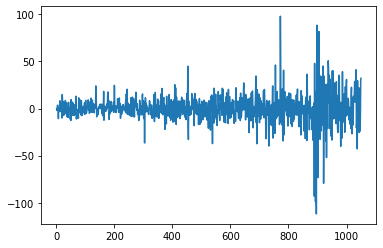

In [69]:
arima_fit = model_fit1
arima_fit.resid.plot()

We can see for model 2 coefficients of AR and MA are significant

In [70]:
y_hat['ArimaM1'] = model_fit1.forecast(len(test["Close"]))[0]
y_hat['ArimaM2'] = model_fit2.forecast(len(test["Close"]))[0]


In [71]:
rmse = sqrt(mean_squared_error(test["Close"], y_hat["ArimaM1"]))
print("ARIMA M1 rmse:", rmse)


mape = mean_absolute_percentage_error(test["Close"], y_hat["ArimaM1"])
print("ArimaM1 mape:", mape)

all_methods.append("Arima")
all_mape.append(mape)


rmse = sqrt(mean_squared_error(test["Close"], y_hat["ArimaM2"]))
print("ArimaM2 rmse:", rmse)


mape = mean_absolute_percentage_error(test["Close"], y_hat["ArimaM2"])
print("ArimaM2 mape:", mape)


ARIMA M1 rmse: 173.68997952985086
ArimaM1 mape: 0.10877001390487769
ArimaM2 rmse: 173.8914321592647
ArimaM2 mape: 0.10891915347927722


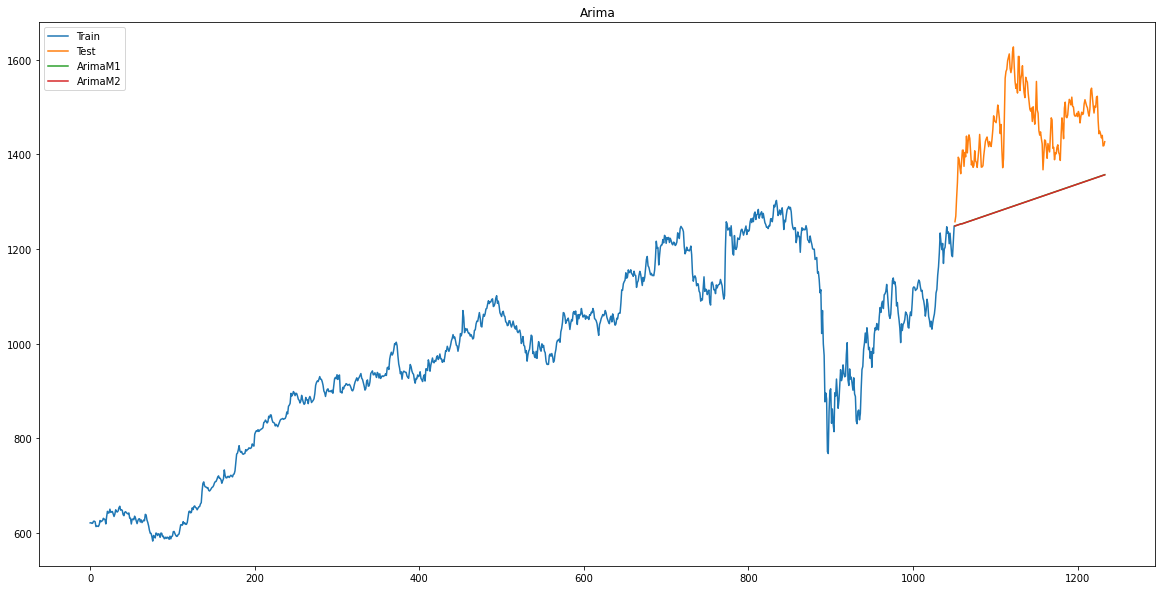

In [72]:
plt.figure(figsize = (20,10))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(y_hat.index, y_hat['ArimaM1'], label='ArimaM1')
plt.plot(y_hat.index, y_hat['ArimaM2'], label='ArimaM2')

plt.legend(loc = 'best')
plt.title("Arima")
plt.show()

## Try SARIMAX

In [73]:
import statsmodels.api as sm
model = sm.tsa.statespace.SARIMAX(train['Close'], order = (0, 1, 0), seasonal_order = (2,1,0,20))
results = model.fit()
results.summary()

c:\users\satish\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'
c:\users\satish\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              Close   No. Observations:                 1050
Model:             SARIMAX(0, 1, 0)x(2, 1, 0, 20)   Log Likelihood               -4410.948
Date:                            Wed, 11 Aug 2021   AIC                           8827.897
Time:                                    22:25:54   BIC                           8842.706
Sample:                                         0   HQIC                          8833.518
                                           - 1050                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L20      -0.6528      0.021    -31.520      0.000      -0.693      -0.612
ar.S.L40      -0.2786      0.018    -15.162      0.000      -0.315      -0.243
sigma2       306.8490      6.386     48.048      0.000     294.332     319.366
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):              2428.62
Prob(Q):                              0.81   Prob(JB):                         0.00
Heteroskedasticity (H):              12.27   Skew:                             0.35
Prob(H) (two-sided):                  0.00   Kurtosis:                        10.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

### We can see that the model coefficients are  significant but the model doesn't have a better log likelihood than ARIMA

In [74]:
y_hat['SARIMAX'] = results.predict(start = 1051, end = 1233)


c:\users\satish\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


In [75]:
y_hat

,Date,Open,Close,High,naive_last,naive_avg,SMA,SES_opti_fcast,SES_manu_fcast,DES_manual,DES_optimal,TES_add_mul,TES_add_add,auto_arima,ArimaM1,ArimaM2,SARIMAX
1051,2020-11-04,1252.000000,1257.400024,1264.800049,1247.949951,972.158666,1221.405005,1247.949951,1230.793984,1249.626430,1247.806140,1246.614087,1246.064147,1259.438017,1248.547472,1248.205336,1262.905903
1052,2020-11-05,1266.000000,1269.199951,1276.000000,1247.949951,972.158666,1224.994995,1247.949951,1230.793984,1272.945878,1247.824956,1244.426545,1244.595078,1262.905903,1249.144994,1249.099225,1273.878424
1053,2020-11-06,1266.250000,1307.650024,1310.000000,1247.949951,972.158666,1232.179993,1247.949951,1230.793984,1293.933382,1247.843584,1247.597648,1247.952592,1273.878424,1249.742515,1249.438701,1255.663214
1054,2020-11-09,1315.199951,1340.550049,1345.949951,1247.949951,972.158666,1245.144995,1247.949951,1230.793984,1312.822136,1247.862027,1250.374864,1250.432301,1255.663214,1250.340037,1250.259573,1242.165343
1055,2020-11-10,1357.000000,1393.650024,1395.000000,1247.949951,972.158666,1261.200000,1247.949951,1230.793984,1329.822014,1247.880287,1250.674532,1250.813243,1242.165343,1250.937558,1250.662449,1258.008871
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,2021-07-26,1430.000000,1434.550049,1444.000000,1247.949951,972.158666,1477.119995,1247.949951,1230.793984,1482.820914,1249.374468,1374.455254,1353.433876,1860.153224,1354.308757,1354.058202,1903.091192
1230,2021-07-27,1436.099976,1439.750000,1449.900024,1247.949951,972.158666,1472.394995,1247.949951,1230.793984,1482.820914,1249.377670,1368.639046,1349.679149,1877.392731,1354.906278,1354.655343,1915.444840
1231,2021-07-28,1435.050049,1417.300049,1438.699951,1247.949951,972.158666,1463.940002,1247.949951,1230.793984,1482.820914,1249.380839,1374.716020,1353.583879,1903.091192,1355.503799,1355.252485,1924.896056
1232,2021-07-29,1428.250000,1418.250000,1429.949951,1247.949951,972.158666,1455.850000,1247.949951,1230.793984,1482.820915,1249.383978,1374.379501,1352.850071,1915.444840,1356.101321,1355.849626,1943.796184


c:\users\satish\appdata\local\programs\python\python39\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


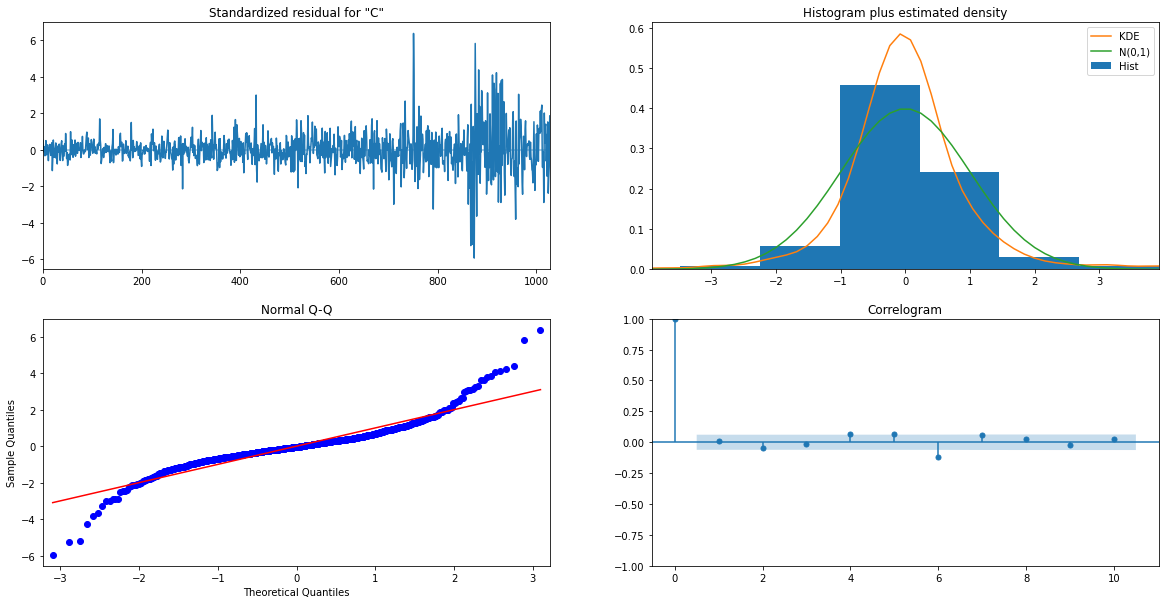

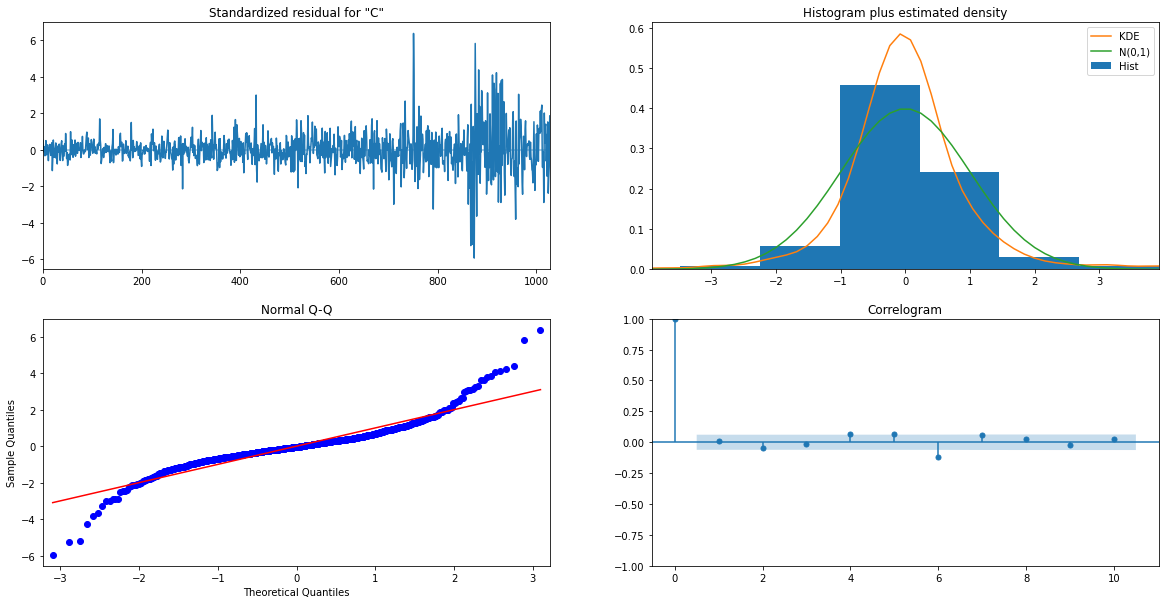

In [76]:
results.plot_diagnostics(figsize = (20,10))

We can see that the residuals are mostly normal with no autocorrelation, but have varying variance

In [77]:
rmse = sqrt(mean_squared_error(test["Close"], y_hat["SARIMAX"]))
print("SARIMAX rmse:", rmse)


mape = mean_absolute_percentage_error(test["Close"], y_hat["SARIMAX"])
print("SARIMAX mape:", mape)

all_methods.append("SARIMAX")
all_mape.append(mape)



SARIMAX rmse: 214.09872617122983
SARIMAX mape: 0.1171987499260823


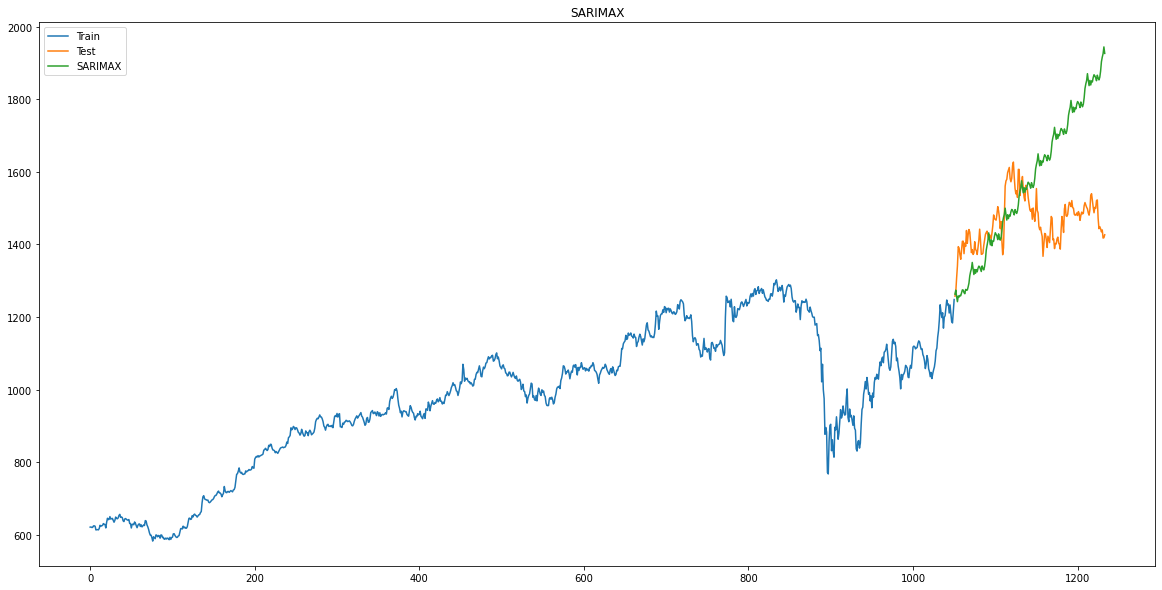

In [78]:
plt.figure(figsize = (20,10))
plt.plot(train.index, train['Close'], label='Train')
plt.plot(test.index, test['Close'], label='Test')
plt.plot(y_hat.index, y_hat['SARIMAX'], label='SARIMAX')

plt.legend(loc = 'best')
plt.title("SARIMAX")
plt.show()

## Granger causalty

Assumption for this test is TS is stationary

Granger causalty means past values of t2 have statistically significant effect on current values of t1, taking past values of t1 as regressors. Hence we can build a AR model.
H0: Time series in second column t2 does not Granger cause the time series in first column t1 

The null hypothesis for all four tests is that coefficients corresponding to past values of second time series are 0

==> params_ftest, ssr_ftest, are based on f distribution

In [80]:
data

,Date,Open,Close,High,SMA
0,2016-08-01,624.500000,621.150024,629.474976,NaN
1,2016-08-02,623.500000,621.650024,628.224976,NaN
2,2016-08-03,620.549988,620.224976,624.974976,NaN
3,2016-08-04,623.299988,620.500000,623.349976,NaN
4,2016-08-05,623.700012,624.625000,627.825012,NaN
...,...,...,...,...,...
1229,2021-07-26,1430.000000,1434.550049,1444.000000,1477.119995
1230,2021-07-27,1436.099976,1439.750000,1449.900024,1472.394995
1231,2021-07-28,1435.050049,1417.300049,1438.699951,1463.940002
1232,2021-07-29,1428.250000,1418.250000,1429.949951,1455.850000


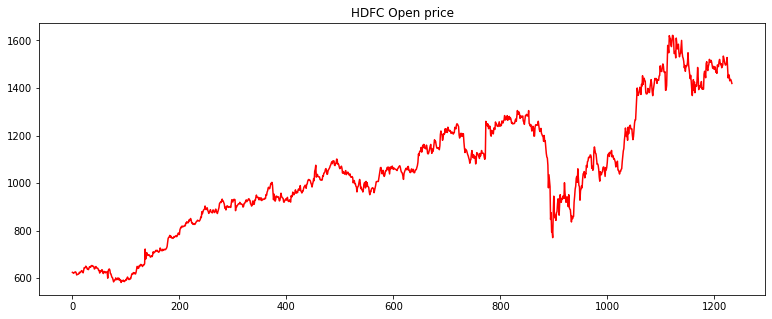

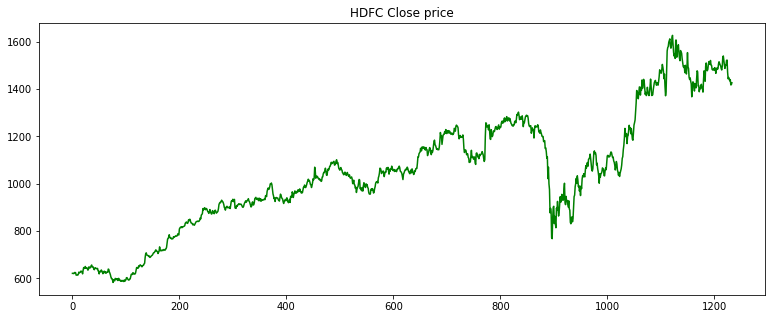

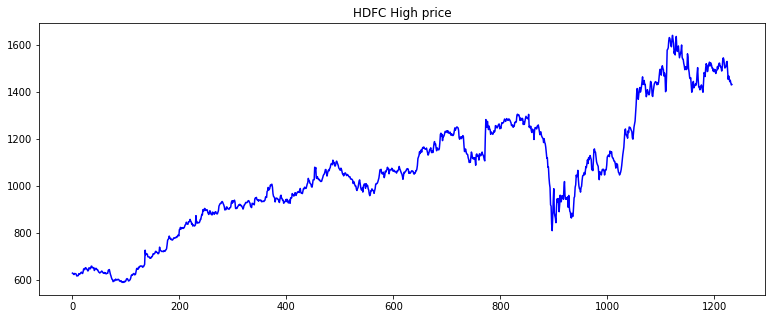

In [81]:
plt.figure(figsize=(13,5))
plt.plot(data["Open"], label = 'Open price', color = 'Red')
plt.title('HDFC Open price')

plt.figure(figsize=(13,5))
plt.plot(data["Close"], label = 'Close price', color = 'Green')
plt.title('HDFC Close price')

plt.figure(figsize=(13,5))
plt.plot(data["High"], label = 'High price', color = 'Blue')
plt.title('HDFC High price')


plt.show()

In [82]:
train["Open"] = data["Open"][0:test_start]
test["Open"] = data["Open"][test_start:]

train["High"] = data["High"][0:test_start]
test["High"] = data["High"][test_start:]


<ipython-input-82-b03cd5811365>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["Open"] = data["Open"][0:test_start]
<ipython-input-82-b03cd5811365>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test["Open"] = data["Open"][test_start:]
<ipython-input-82-b03cd5811365>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

In [83]:
adfuller_test(train["Close"])

ADF Test Statistic : -1.6028800802631662
p-value : 0.48214655808527696
#Lags Used : 7
Number of Observations : 1042
Weak evidence against null hypothesis, indicating it is non-stationary 


In [84]:
adfuller_test(train["Open"])

ADF Test Statistic : -1.603950303464711
p-value : 0.48160882123295545
#Lags Used : 10
Number of Observations : 1039
Weak evidence against null hypothesis, indicating it is non-stationary 


In [85]:
adfuller_test(train["High"])

ADF Test Statistic : -1.5357021991343092
p-value : 0.515781896323222
#Lags Used : 1
Number of Observations : 1048
Weak evidence against null hypothesis, indicating it is non-stationary 


In [86]:
train['Close First Difference'] = train['Close'] - train['Close'].shift(1)
train['Open First Difference'] = train['Open'] - train['Open'].shift(1)
train['High First Difference'] = train['High'] - train['High'].shift(1)


<ipython-input-86-60319b4c1cab>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Close First Difference'] = train['Close'] - train['Close'].shift(1)
<ipython-input-86-60319b4c1cab>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train['Open First Difference'] = train['Open'] - train['Open'].shift(1)
<ipython-input-86-60319b4c1cab>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

In [87]:
adfuller_test(train["Close First Difference"].dropna())

ADF Test Statistic : -11.936807313732704
p-value : 4.641837556618038e-22
#Lags Used : 6
Number of Observations : 1042
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [88]:
adfuller_test(train["Open First Difference"].dropna())

ADF Test Statistic : -10.79123701137842
p-value : 2.1305203710271502e-19
#Lags Used : 9
Number of Observations : 1039
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [89]:
adfuller_test(train["High First Difference"].dropna())

ADF Test Statistic : -29.722232153205795
p-value : 0.0
#Lags Used : 0
Number of Observations : 1048
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


In [90]:
ts_df = pd.DataFrame(columns = ['Open', 'Close'], data = zip(train["Open"], train["Close"]))
ts_df

,Open,Close
0,624.500000,621.150024
1,623.500000,621.650024
2,620.549988,620.224976
3,623.299988,620.500000
4,623.700012,624.625000
...,...,...
1045,1228.000000,1209.599976
1046,1200.599976,1187.199951
1047,1182.550049,1183.550049
1048,1194.349976,1215.250000


In [91]:
# Can I model t1 using previous value of t1 and previous value of t2 
from statsmodels.tsa.stattools import grangercausalitytests
gc_res = grangercausalitytests(ts_df.dropna(), maxlag = 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=2465.9979, p=0.0000  , df_denom=1046, df_num=1
ssr based chi2 test:   chi2=2473.0706, p=0.0000  , df=1
likelihood ratio test: chi2=1270.5611, p=0.0000  , df=1
parameter F test:         F=2465.9979, p=0.0000  , df_denom=1046, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=1218.7340, p=0.0000  , df_denom=1043, df_num=2
ssr based chi2 test:   chi2=2449.1528, p=0.0000  , df=2
likelihood ratio test: chi2=1262.9087, p=0.0000  , df=2
parameter F test:         F=1218.7340, p=0.0000  , df_denom=1043, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=834.6002, p=0.0000  , df_denom=1040, df_num=3
ssr based chi2 test:   chi2=2520.6531, p=0.0000  , df=3
likelihood ratio test: chi2=1283.6001, p=0.0000  , df=3
parameter F test:         F=834.6002, p=0.0000  , df_denom=1040, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=628.

Thus we can see Open price Granger causes Close price

In [92]:
ts_df = pd.DataFrame(columns = ['High', 'Close'], data = zip(train["High"], train["Close"]))
ts_df

,High,Close
0,629.474976,621.150024
1,628.224976,621.650024
2,624.974976,620.224976
3,623.349976,620.500000
4,627.825012,624.625000
...,...,...
1045,1232.000000,1209.599976
1046,1204.449951,1187.199951
1047,1199.300049,1183.550049
1048,1225.000000,1215.250000


In [93]:
# Can I model t1 using previous value of t1 and previous value of t2 
from statsmodels.tsa.stattools import grangercausalitytests
gc_res = grangercausalitytests(ts_df, maxlag = 5)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=290.1934, p=0.0000  , df_denom=1046, df_num=1
ssr based chi2 test:   chi2=291.0257, p=0.0000  , df=1
likelihood ratio test: chi2=256.8492, p=0.0000  , df=1
parameter F test:         F=290.1934, p=0.0000  , df_denom=1046, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=176.3765, p=0.0000  , df_denom=1043, df_num=2
ssr based chi2 test:   chi2=354.4440, p=0.0000  , df=2
likelihood ratio test: chi2=305.3168, p=0.0000  , df=2
parameter F test:         F=176.3765, p=0.0000  , df_denom=1043, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=121.1026, p=0.0000  , df_denom=1040, df_num=3
ssr based chi2 test:   chi2=365.7531, p=0.0000  , df=3
likelihood ratio test: chi2=313.6931, p=0.0000  , df=3
parameter F test:         F=121.1026, p=0.0000  , df_denom=1040, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=91.6294 , p=0.

Thus we can see High price Granger causes Close price

In [94]:
from statsmodels.tsa.vector_ar.var_model import VAR

# since VAR accepts only stationary data
diff_causuality_df = pd.DataFrame()

diff_causuality_df['High'] = train["High First Difference"].dropna()
diff_causuality_df['Close'] = train["Close First Difference"].dropna()

model = VAR(diff_causuality_df)

model_fit = model.fit(maxlags = 1)

model_fit.summary()

c:\users\satish\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:578: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  warnings.warn('An unsupported index was provided and will be'


  Summary of Regression Results   
Model:                         VAR
Method:                        OLS
Date:           Wed, 11, Aug, 2021
Time:                     22:26:15
--------------------------------------------------------------------
No. of Equations:         2.00000    BIC:                    9.59214
Nobs:                     1048.00    HQIC:                   9.57453
Log likelihood:          -7979.51    FPE:                    14239.5
AIC:                      9.56377    Det(Omega_mle):         14158.3
--------------------------------------------------------------------
Results for equation High
              coefficient       std. error           t-stat            prob
---------------------------------------------------------------------------
const            0.464133         0.381824            1.216           0.224
L1.High         -0.350036         0.037933           -9.228           0.000
L1.Close         0.579985         0.035040           16.552           0.000

Resu

In [95]:
from statsmodels.stats.stattools import durbin_watson
out = durbin_watson(model_fit.resid)

out

# Value around 2 in both columns, so no auto correlation, so we can proceed

array([2.14906012, 1.9935712 ])

In [96]:
# Get the lag order
lag_order = model_fit.k_ar
print(lag_order)

# Input data for forecasting
input_data = diff_causuality_df.values[-lag_order:]
print(input_data)


1
[[25.75     32.699951]]


In [97]:
# forecasting
pred = model_fit.forecast(y = input_data, steps = 182)
pred = (pd.DataFrame(pred, index = test.index, columns = ts_df.columns))

print(pred)

           High     Close
1051  10.416188  0.963838
1052  -2.622894  0.443172
1053   1.639273  0.647780
1054   0.266031  0.581741
1055   0.708413  0.603015
...         ...       ...
1229   0.600626  0.597832
1230   0.600626  0.597832
1231   0.600626  0.597832
1232   0.600626  0.597832
1233   0.600626  0.597832

[182 rows x 2 columns]


In [98]:
# invert the differencing
pred_inv = pred.copy()

for col in ts_df.columns:        
    pred_inv[col] = train[col].iloc[-1] + pred_inv[col].cumsum()



In [99]:
rmse = sqrt(mean_squared_error(test["Close"], pred_inv["Close"]))
print("Granger Close rmse:", rmse)


mape = mean_absolute_percentage_error(test["Close"], pred_inv["Close"])
print("Granger Close mape:", mape)

all_methods.append("Granger")
all_mape.append(mape)



Granger Close rmse: 173.4328112583147
Granger Close mape: 0.10857986933789449


In [100]:
all_methods

['Naive last',
 'Naive average',
 'SMA',
 'SES',
 'DES',
 'TES',
 'Auto arima',
 'Arima',
 'SARIMAX',
 'Granger']

In [101]:
rmse = sqrt(mean_squared_error(test["High"], pred_inv["High"]))
print("Granger High rmse:", rmse)


mape = mean_absolute_percentage_error(test["High"], pred_inv["High"])
print("Granger High mape:", mape)


Granger High rmse: 179.98586782246846
Granger High mape: 0.11137834452973919


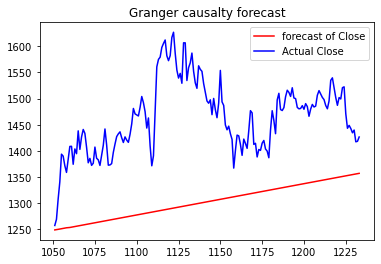

In [102]:
plt.plot( pred_inv["Close"], color='r', label='forecast of Close')
plt.plot(test['Close'], color='b', label='Actual Close')
plt.title("Granger causalty forecast")

plt.legend()
plt.show()

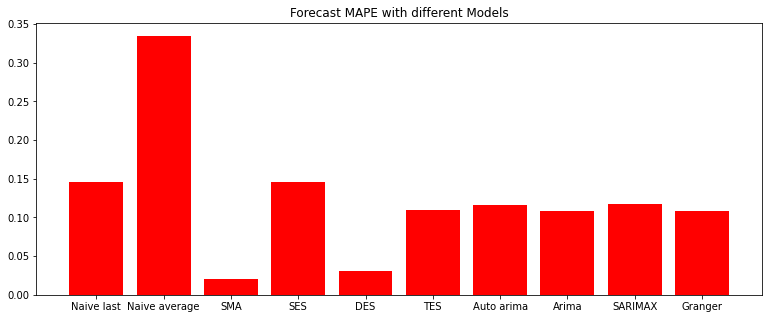

In [223]:
plt.figure(figsize=(13,5))

plt.bar(all_methods, all_mape, color = 'Red')

plt.title('Forecast MAPE with different Models')

plt.show()

### We can see the following as model forecast performance in decreasing order: SMA > DES > TES = Granger > ARIMA > AUTO ARIMA > SARIMAX > Naive last = SES > Naive average. It can be affected by volatality in the stock and also the sudden drastic dip in the market during March 2020.

## ARMA + ARCH and GARCH

In [174]:
data2 = data.copy()

data2['returns'] = data2['Close'].pct_change().dropna()

data2.head()


,Date,Open,Close,High,SMA,returns
0,2016-08-01,624.500000,621.150024,629.474976,NaN,NaN
1,2016-08-02,623.500000,621.650024,628.224976,NaN,0.000805
2,2016-08-03,620.549988,620.224976,624.974976,NaN,-0.002292
3,2016-08-04,623.299988,620.500000,623.349976,NaN,0.000443
4,2016-08-05,623.700012,624.625000,627.825012,NaN,0.006648


In [175]:
data2.Date = pd.to_datetime(data2['Date'])

data2.set_index("Date", inplace = True)
data2.head()

,Open,Close,High,SMA,returns
Date,,,,,
2016-08-01,624.500000,621.150024,629.474976,NaN,NaN
2016-08-02,623.500000,621.650024,628.224976,NaN,0.000805
2016-08-03,620.549988,620.224976,624.974976,NaN,-0.002292
2016-08-04,623.299988,620.500000,623.349976,NaN,0.000443
2016-08-05,623.700012,624.625000,627.825012,NaN,0.006648


In [176]:
train_df = data2.loc[:"2020-11-04"]
test_df = data2.loc["2020-11-04":]



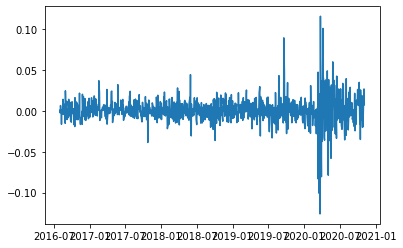

In [177]:
plt.plot(train_df['returns'])

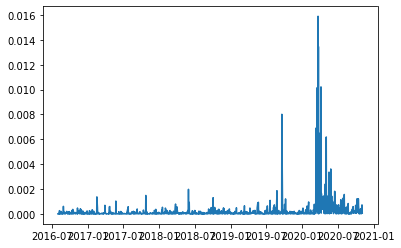

In [178]:
plt.plot(np.square(train_df['returns']))

In [180]:
# check stationarity

adfuller_test(train_df["returns"].dropna())

ADF Test Statistic : -10.240128526001712
p-value : 4.7735655887983085e-18
#Lags Used : 10
Number of Observations : 1039
Strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


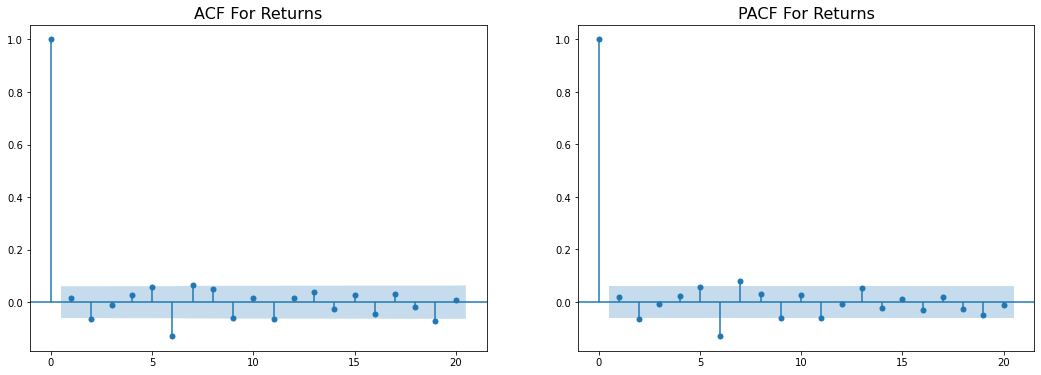

In [181]:
import statsmodels.graphics.tsaplots as sgt

plt.rcParams["figure.figsize"] = 18, 6

fig, axes = plt.subplots(1, 2)

# slice 1: to avoid nan
sgt.plot_acf(train_df.returns[1:],  lags = 20, ax = axes[0])
sgt.plot_pacf(train_df.returns[1:],  lags = 20, ax = axes[1])

axes[0].set_title("ACF For Returns", size = 16)
axes[1].set_title("PACF For Returns", size = 16)

plt.show()

In [185]:
from pmdarima import auto_arima

# Fit auto_arima function 
stepwise_fit = auto_arima(train_df.returns[1:], start_p = 0, start_q = 0,
                          max_p = 3, max_q = 3,
                          start_P = 0, 
                          d = 0, D = 0, trace = True,
                          error_action ='ignore',   # we don't want to know if an order does not work
                          suppress_warnings = True,  # we don't want convergence warnings
                          stepwise = True) 

Performing stepwise search to minimize aic
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-5791.816, Time=0.13 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-5790.118, Time=0.07 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-5790.158, Time=0.10 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-5791.030, Time=0.04 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-5788.599, Time=0.24 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 0.582 seconds


In [182]:
# try auto arima
from pmdarima import auto_arima

model = auto_arima(train_df.returns[1:], trace = "True")

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=-5788.238, Time=2.35 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=-5791.816, Time=0.27 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=-5790.118, Time=0.32 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=-5790.158, Time=0.12 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=-5791.030, Time=0.17 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=-5788.599, Time=0.37 sec

Best model:  ARIMA(0,0,0)(0,0,0)[0] intercept
Total fit time: 4.526 seconds


In [195]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(train_df['returns'][1:], order = (0, 0, 0))

model_results = model.fit()
print(model_results.summary())

arma_forecast = model_results.get_forecast(steps = len(test_df['returns']))
arma_predictions_df = arma_forecast.conf_int(alpha = 0.05) # Confidence level of 95%


arma_predictions_df["forecast_arma"] = model_results.predict(start = 1050, end = 1231)
arma_predictions_df

                               SARIMAX Results                                
Dep. Variable:                returns   No. Observations:                 1050
Model:                        SARIMAX   Log Likelihood                2896.515
Date:                Thu, 12 Aug 2021   AIC                          -5791.030
Time:                        13:37:41   BIC                          -5786.073
Sample:                             0   HQIC                         -5789.150
                               - 1050                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
sigma2         0.0002   3.61e-06     65.137      0.000       0.000       0.000
Ljung-Box (L1) (Q):                   0.30   Jarque-Bera (JB):              8931.64
Prob(Q):                              0.58   Pr

,lower returns,upper returns,forecast_arma
1050,-0.030059,0.030059,0.0
1051,-0.030059,0.030059,0.0
1052,-0.030059,0.030059,0.0
1053,-0.030059,0.030059,0.0
1054,-0.030059,0.030059,0.0
...,...,...,...
1227,-0.030059,0.030059,0.0
1228,-0.030059,0.030059,0.0
1229,-0.030059,0.030059,0.0
1230,-0.030059,0.030059,0.0


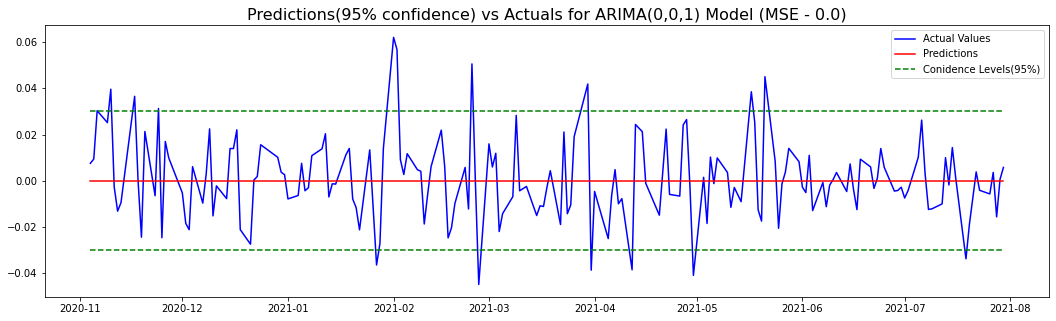

In [192]:
arma_mse = mean_squared_error(test_df["returns"].values, arma_predictions_df["forecast_arma"])

plt.rcParams["figure.figsize"] = 18, 5

plt.plot(test_df.index, test_df["returns"], color = "blue", label = "Actual Values")

plt.plot(test_df.index,arma_predictions_df["forecast_arma"], color = "red", label = "Predictions")
plt.plot(test_df.index,arma_predictions_df["upper returns"], color = "green", linestyle = "--", label = "Conidence Levels(95%)")
plt.plot(test_df.index,arma_predictions_df["lower returns"],  color = "green", linestyle = "--")

plt.title(f"Predictions(95% confidence) vs Actuals for ARIMA(0,0,1) Model (MSE - {round(arma_mse, 2)})", size = 16)

plt.legend()
plt.show()

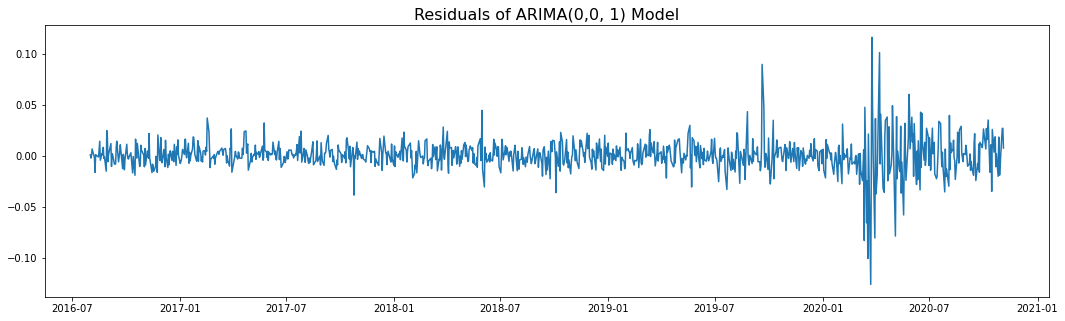

In [193]:
resids = model_results.resid

plt.rcParams["figure.figsize"] = 18, 5

plt.plot(resids)
plt.title("Residuals of ARIMA(0,0, 1) Model", size = 16)

plt.show()

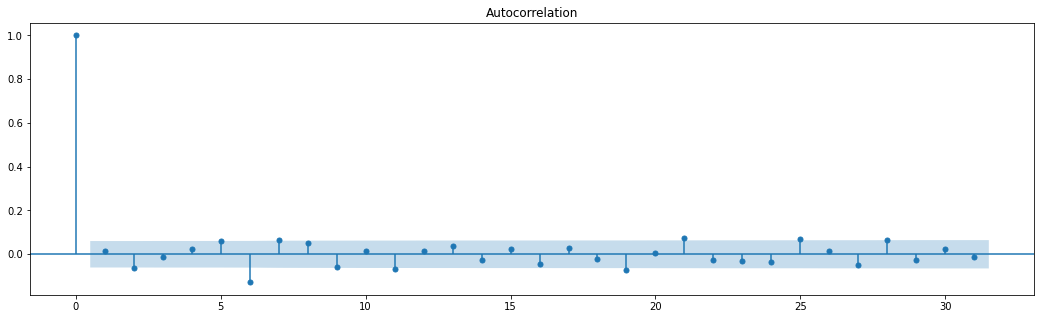

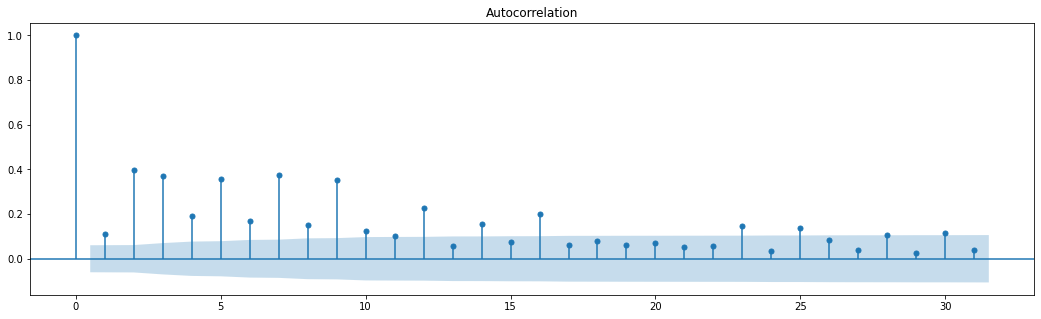

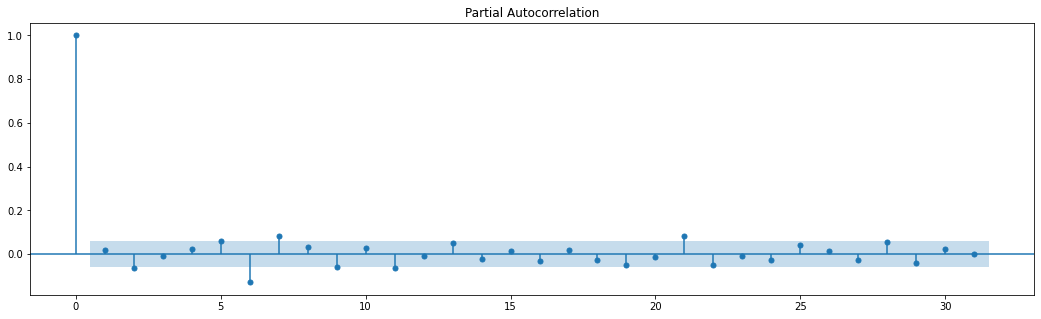

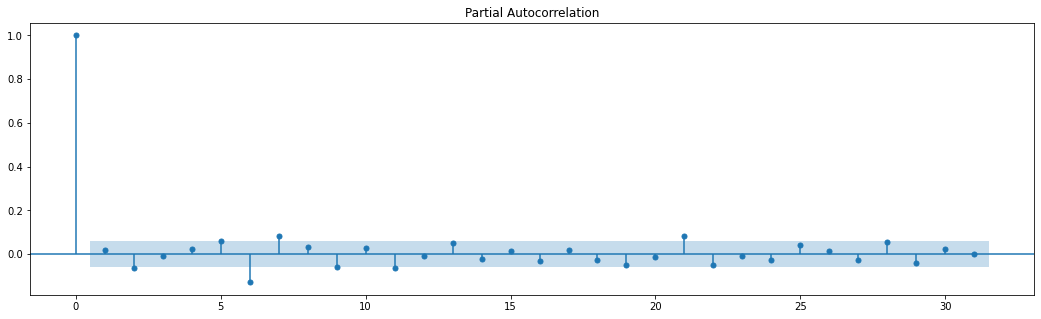

In [194]:
# to get some idea for GARCH model 
sm.graphics.tsa.plot_acf(resids);
sm.graphics.tsa.plot_acf(resids**2);

sm.graphics.tsa.plot_pacf(resids);
sm.graphics.tsa.plot_pacf(resids);



In [196]:
# a new dataframe created to hold the residuals of ARMA model

resid_df = data2.copy()
resid_df["ret_resid"] = resid_df["returns"].shift(1).loc[resid_df.index]

resid_df.loc[train_df.index[1]:train_df.index[-1], "ret_resid"] = resids  # for the train data, residuals are updated from model fitted values
resid_df

#resid_df.iloc[[0,1,2,3,1008,1009,1010,1011],]

,Open,Close,High,SMA,returns,ret_resid
Date,,,,,,
2016-08-01,624.500000,621.150024,629.474976,NaN,NaN,NaN
2016-08-02,623.500000,621.650024,628.224976,NaN,0.000805,0.000805
2016-08-03,620.549988,620.224976,624.974976,NaN,-0.002292,-0.002292
2016-08-04,623.299988,620.500000,623.349976,NaN,0.000443,0.000443
2016-08-05,623.700012,624.625000,627.825012,NaN,0.006648,0.006648
...,...,...,...,...,...,...
2021-07-26,1430.000000,1434.550049,1444.000000,1477.119995,-0.005684,-0.004107
2021-07-27,1436.099976,1439.750000,1449.900024,1472.394995,0.003625,-0.005684
2021-07-28,1435.050049,1417.300049,1438.699951,1463.940002,-0.015593,0.003625


In [198]:
resids

Date
2016-08-02    0.000805
2016-08-03   -0.002292
2016-08-04    0.000443
2016-08-05    0.006648
2016-08-08    0.000280
                ...   
2020-10-29   -0.018519
2020-10-30   -0.003074
2020-11-02    0.026784
2020-11-03    0.026908
2020-11-04    0.007572
Length: 1050, dtype: float64

https://arch.readthedocs.io/en/latest/univariate/univariate_volatility_forecasting.html


In [222]:
# model fitting 

resid_model = arch_model(resid_df["ret_resid"][1:], p = 1, q = 1, vol = "GARCH")
resid_model_results = resid_model.fit(last_obs = test_df.index[0], update_freq = 5)

resid_model_results.summary()

Iteration:      5,   Func. Count:     52,   Neg. LLF: 552713.0637947506
Iteration:     10,   Func. Count:    103,   Neg. LLF: -3144.540415409946
Optimization terminated successfully    (Exit mode 0)
            Current function value: -3144.540416966662
            Iterations: 14
            Function evaluations: 103
            Gradient evaluations: 10


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              ret_resid   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                3144.54
Distribution:                  Normal   AIC:                          -6281.08
Method:            Maximum Likelihood   BIC:                          -6261.26
                                        No. Observations:                 1049
Date:                Thu, Aug 12 2021   Df Residuals:                     1048
Time:                        15:56:40   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu         1.0741e-03  3.539e-04      3.035  2.402e-03 [3.806e-04,1.768e-03]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      4.8415e-06  1.709e-10  2.833e+04      0.000 [4.841e-06,4.842e-06]
alpha[1]       0.1000  6.700e-03     14.923  2.321e-50   [8.685e-02,  0.113]
beta[1]        0.8798  1.299e-02     67.724      0.000     [  0.854,  0.905]
============================================================================

Covariance estimator: robust
"""

In [212]:
# Forecast residual variance on test data 

resid_forecasts = resid_model_results.forecast().residual_variance.iloc[1049:].values

In [213]:
# Volatility ie standard deviation of the forecasted variances

resid_forecasts_var = resid_forecasts.reshape(-1,)
resid_forecasts_stdv = np.sqrt(resid_forecasts_var)
resid_forecasts_stdv

array([0.01801757, 0.01716633, 0.01646254, 0.01812884, 0.01876165,
       0.02151781, 0.02033726, 0.01972084, 0.01892068, 0.02110845,
       0.01992339, 0.02046655, 0.02035583, 0.01936649, 0.02063857,
       0.02110872, 0.02054836, 0.01960143, 0.01862443, 0.01865156,
       0.01898089, 0.01800955, 0.01736872, 0.01645029, 0.01698889,
       0.01688687, 0.01602528, 0.01544308, 0.01520727, 0.01499565,
       0.01570541, 0.01646525, 0.01801511, 0.01704226, 0.01613807,
       0.01597043, 0.01548047, 0.01496444, 0.01423238, 0.01353913,
       0.01319286, 0.01278623, 0.01236459, 0.01192688, 0.01147512,
       0.01141475, 0.01165109, 0.01270666, 0.01238532, 0.01184748,
       0.01135617, 0.01133973, 0.01160426, 0.01146006, 0.01167347,
       0.01320195, 0.01316444, 0.01725493, 0.01859989, 0.01804561,
       0.02574524, 0.02996469, 0.02830742, 0.0266482 , 0.02531696,
       0.02387765, 0.02252527, 0.02214147, 0.02100221, 0.01988607,
       0.01990352, 0.01886869, 0.0196064 , 0.01971586, 0.01893

In [214]:
arma_garch_predictions_df

,lower returns,upper returns,forecast_arma,lower ret,upper ret
1050,-0.030059,0.030059,0.0,-0.014628,0.014628
1051,-0.030059,0.030059,0.0,-0.011611,0.011611
1052,-0.030059,0.030059,0.0,-0.011712,0.011712
1053,-0.030059,0.030059,0.0,-0.014613,0.014613
1054,-0.030059,0.030059,0.0,-0.016962,0.016962
...,...,...,...,...,...
1227,-0.030059,0.030059,0.0,-0.011446,0.011446
1228,-0.030059,0.030059,0.0,-0.011706,0.011706
1229,-0.030059,0.030059,0.0,-0.011609,0.011609
1230,-0.030059,0.030059,0.0,-0.012519,0.012519


In [215]:
# Mean & volatility combined for the forecast (ie mean +- standard deviation)

arma_garch_predictions_df = arma_predictions_df.copy()
arma_garch_predictions_df["lower ret"] = arma_garch_predictions_df["forecast_arma"] - 1*resid_forecasts_stdv
arma_garch_predictions_df["upper ret"] = arma_garch_predictions_df["forecast_arma"] + 1*resid_forecasts_stdv

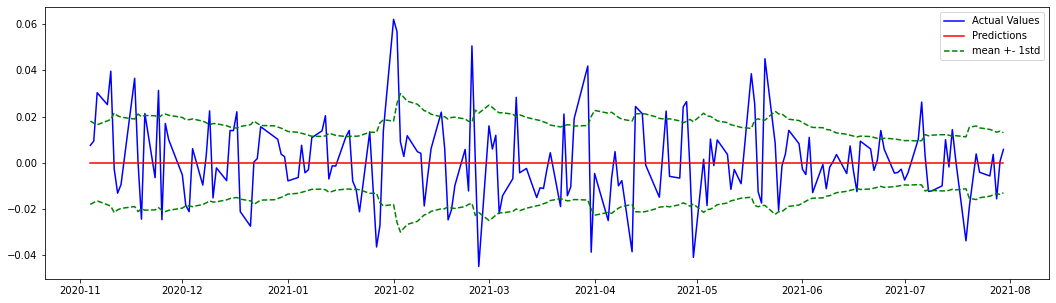

In [216]:
# plotting the forecasts combined : (S)ARIMA + (G)ARCH

plt.rcParams["figure.figsize"] = 18, 5

plt.plot(test_df["returns"], color = "blue", label = "Actual Values")

plt.plot(test_df.index,arma_garch_predictions_df["forecast_arma"], color = "red", label = "Predictions")
plt.plot(test_df.index,arma_garch_predictions_df["lower ret"], color = "green", linestyle = "--", label = "mean +- 1std")
plt.plot(test_df.index,arma_garch_predictions_df["upper ret"], color = "green", linestyle = "--")
plt.legend()
plt.show()